
# <font color = Gold> *Telecom Churn Assignment*
  
<font color="steelblue"><b>Business Problem Overview</b></font>
Telecom companies face a 15-25% annual churn rate and find it 5-10 times more expensive to acquire new customers than to retain existing ones. Retaining high-value customers is crucial for reducing revenue loss.

<font color="grey"><b>Churn Prediction Objective</b></font>
Analyze customer data, build models to identify high-risk churners, and determine key churn indicators.

<font color="grey"><b>Understanding and Defining Churn</b></font>
<b>Postpaid Model</b>: Churn is directly observed when customers terminate services.
<b>Prepaid Model</b>: Churn is harder to detect; customers may stop using services temporarily without notice.

<font color="grey"><b>Definitions of Churn</b></font>
<b>Revenue-Based Churn</b>: Defined as customers who generate below a certain revenue threshold.
<b>Usage-Based Churn</b>: Defined as customers with no usage (calls, internet) over a period. This project uses the usage-based definition.

<font color="grey"><b>High-Value Churn</b></font>
80% of revenue comes from the top 20% of customers. Focus on reducing churn among high-value customers to prevent significant revenue loss.


<font color = SteelBlue>**Business Objective**:</font> Predict customer churn in the fourth month (September) using data from the first three months (June, July, August).


### Importing libraries

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Markdown, display ,HTML

# libraries for Model building and evalution
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression ,RidgeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE, ADASYN

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 10000)
pd.options.display.max_seq_items = 2000

In [3]:
# Importing the Telecom Churn data file into a pandas dataframe

dframe = pd.read_csv("telecom_churn_data.csv")
dframe.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
dframe.shape

(99999, 226)

In [5]:
dframe.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7'

In [6]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
dframe.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
dframe.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

# EDA

### Data Cleaning

In [9]:
# %age of null values

x = (dframe.isnull().sum()/len(dframe)*100)
x.sort_values(ascending = False).head(50)

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

In [10]:
# Checking for duplicates

dframe.drop_duplicates(subset=None, inplace=True)
dframe.shape

(99999, 226)

In [11]:
dframe.ndim

2

In [ ]:
# Categorize columns

id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in dframe.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("# ID cols: %d\n# Date cols: %d\n# Numeric cols: %d\n# Category cols: %d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

In [13]:
dframe[[
    'count_rech_2g_6', 'date_of_last_rech_data_6', 'count_rech_3g_6',
    'av_rech_amt_data_6', 'max_rech_data_6', 'total_rech_data_6', 'arpu_3g_6',
    'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'arpu_3g_7',
    'count_rech_2g_7', 'fb_user_7', 'count_rech_3g_7', 'arpu_2g_7',
    'av_rech_amt_data_7', 'max_rech_data_7', 'night_pck_user_7',
    'total_rech_data_7', 'date_of_last_rech_data_7', 'night_pck_user_9',
    'date_of_last_rech_data_9', 'fb_user_9', 'arpu_2g_9', 'max_rech_data_9',
    'arpu_3g_9', 'total_rech_data_9', 'av_rech_amt_data_9', 'count_rech_3g_9',
    'count_rech_2g_9', 'fb_user_8', 'av_rech_amt_data_8', 'count_rech_3g_8',
    'count_rech_2g_8', 'date_of_last_rech_data_8', 'total_rech_data_8',
    'max_rech_data_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8'
]].head(10)

,count_rech_2g_6,date_of_last_rech_data_6,count_rech_3g_6,av_rech_amt_data_6,max_rech_data_6,total_rech_data_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,fb_user_6,arpu_3g_7,count_rech_2g_7,fb_user_7,count_rech_3g_7,arpu_2g_7,av_rech_amt_data_7,max_rech_data_7,night_pck_user_7,total_rech_data_7,date_of_last_rech_data_7,night_pck_user_9,date_of_last_rech_data_9,fb_user_9,arpu_2g_9,max_rech_data_9,arpu_3g_9,total_rech_data_9,av_rech_amt_data_9,count_rech_3g_9,count_rech_2g_9,fb_user_8,av_rech_amt_data_8,count_rech_3g_8,count_rech_2g_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,arpu_3g_8,arpu_2g_8,night_pck_user_8
0,0.0,6/21/2014,1.0,252.0,252.0,1.0,212.17,212.17,0.0,1.0,212.17,0.0,1.0,1.0,212.17,252.0,252.0,0.0,1.0,7/16/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,252.0,1.0,0.0,8/8/2014,1.0,252.0,212.17,212.17,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1.0,1.0,0.0,28.61,154.0,154.0,0.0,1.0,7/25/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,50.0,0.0,2.0,8/10/2014,2.0,25.0,0.00,7.60,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9/17/2014,1.0,0.0,46.0,2.84,1.0,46.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,6/4/2014,0.0,56.0,56.0,1.0,0.00,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.0,1.0,0.0,0.00,177.0,154.0,0.0,2.0,7/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,69.0,0.0,3.0,8/23/2014,3.0,23.0,19.83,0.00,0.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1.0,1.0,0.0,0.00,154.0,154.0,0.0,1.0,7/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Impute missing values

In [14]:
recharge_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

dframe[recharge_columns].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


We can create new feature as **total_rech_amt_data** using **total_rech_data** and **av_rech_amt_data** to capture amount utilized by customer for data.

In the recharge variables whereever minumum value is 1, we can impute missing values as zero since it means customer didn't recharge their number that month.

In [15]:
zero_impute_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

# Impute missing values with 0
dframe[zero_impute_columns] = dframe[zero_impute_columns].apply(lambda x: x.fillna(0))

# Check for missing values
print("Missing value ratio after inputation:\n")
print(dframe[zero_impute_columns].isnull().sum()*100/dframe.shape[1])

Missing value ratio after inputation:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [16]:
# Dropping ID and Date columns

print("Shape before dropping date and ID columns : {}".format(dframe.shape))
dframe.drop(id_cols+date_cols, axis=1, inplace=True)
print("Shape after dropping date and ID columns : {}".format(dframe.shape))

Shape before dropping date and ID columns : (99999, 226)
Shape after dropping date and ID columns : (99999, 212)


In [17]:
# Check for missing values

(dframe[cat_cols].isnull().sum()/len(dframe))*100

night_pck_user_6    74.846748
night_pck_user_7    74.428744
night_pck_user_8    73.660737
night_pck_user_9    74.077741
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
dtype: float64

In [18]:
# Imputing with '-1' in categorical columns

dframe[cat_cols] = dframe[cat_cols].apply(lambda x: x.fillna('-1'))

In [19]:
# Recheck missing values

dframe[cat_cols].isnull().sum()*100/dframe.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

In [20]:
# Drop columns with > 40% missing values

missing_values = dframe.isnull().sum()*100/len(dframe)
column_to_be_drop = missing_values[missing_values>50].index


dframe.drop(column_to_be_drop, axis=1, inplace=True)

# Recheck for missing values

dframe_missing = dframe.isnull().sum()*100/dframe.shape[0]
dframe_missing.sort_values(ascending=False).head(20)

std_ic_t2t_mou_9    7.745077
loc_og_t2t_mou_9    7.745077
loc_og_t2f_mou_9    7.745077
loc_og_t2c_mou_9    7.745077
loc_og_mou_9        7.745077
std_og_t2t_mou_9    7.745077
std_og_t2m_mou_9    7.745077
std_og_t2f_mou_9    7.745077
std_og_mou_9        7.745077
isd_og_mou_9        7.745077
spl_og_mou_9        7.745077
og_others_9         7.745077
spl_ic_mou_9        7.745077
loc_ic_t2t_mou_9    7.745077
loc_ic_t2m_mou_9    7.745077
loc_ic_t2f_mou_9    7.745077
loc_ic_mou_9        7.745077
std_ic_t2m_mou_9    7.745077
std_ic_t2f_mou_9    7.745077
std_ic_t2o_mou_9    7.745077
dtype: float64

In [21]:
len(dframe_missing[dframe_missing > 0])

119

In [22]:
# Drop columns with constant

zero_variance_columns = pd.DataFrame(dframe.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print("Zero Variance Variables are as follows: \n {} \n\n".format(zero_variance_columns[zero_variance_columns['nunique'] == 1]))


dframe.drop(list(zero_variance_columns[zero_variance_columns['nunique'] == 1]['feature']),axis=1, inplace=True)

print("Shape after dropping the zero variance variables : ", dframe.shape)

Zero Variance Variables are as follows: 
               feature  nunique
0      loc_og_t2o_mou        1
1      std_og_t2o_mou        1
2      loc_ic_t2o_mou        1
55   std_og_t2c_mou_6        1
56   std_og_t2c_mou_7        1
57   std_og_t2c_mou_8        1
58   std_og_t2c_mou_9        1
107  std_ic_t2o_mou_6        1
108  std_ic_t2o_mou_7        1
109  std_ic_t2o_mou_8        1
110  std_ic_t2o_mou_9        1 


Shape after dropping the zero variance variables :  (99999, 185)


In [23]:
# Check %age of missing values

dframe_missing = dframe.isnull().sum()*100/dframe.shape[0]
dframe_missing[dframe_missing > 0].sort_values(ascending=False)

ic_others_9         7.745077
std_ic_t2m_mou_9    7.745077
loc_ic_t2t_mou_9    7.745077
loc_og_t2f_mou_9    7.745077
loc_ic_t2m_mou_9    7.745077
spl_og_mou_9        7.745077
loc_og_t2m_mou_9    7.745077
loc_ic_t2f_mou_9    7.745077
std_og_t2m_mou_9    7.745077
loc_ic_mou_9        7.745077
loc_og_t2t_mou_9    7.745077
std_ic_t2t_mou_9    7.745077
loc_og_mou_9        7.745077
og_others_9         7.745077
roam_og_mou_9       7.745077
isd_og_mou_9        7.745077
std_ic_t2f_mou_9    7.745077
roam_ic_mou_9       7.745077
std_og_mou_9        7.745077
std_ic_mou_9        7.745077
offnet_mou_9        7.745077
spl_ic_mou_9        7.745077
std_og_t2t_mou_9    7.745077
isd_ic_mou_9        7.745077
onnet_mou_9         7.745077
std_og_t2f_mou_9    7.745077
loc_og_t2c_mou_9    7.745077
spl_og_mou_8        5.378054
std_og_mou_8        5.378054
og_others_8         5.378054
loc_ic_mou_8        5.378054
loc_ic_t2t_mou_8    5.378054
loc_ic_t2m_mou_8    5.378054
loc_ic_t2f_mou_8    5.378054
std_ic_t2t_mou

In [24]:
dframe[dframe_missing[dframe_missing > 0].index].head(20)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
0,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN
1,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.0,0.00,0.00,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.00,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.00,47.64,108.68,120.94,18.04,0.0,0.00,0.00,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.00,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,139.33,306.66,239.03,171.49,0.21,0.00,0.00,0.45,0.00,0.85,0.00,0.01,0.93,3.14,0.00,0.36
3,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.00,0.00,0.00,0.00,29.23,16.63,296.11,236.21,0.0,0.00,0.00,0.0,10.96,0.00,18.09,43.29,0.00,0.0,0.0,0.00,62.08,19.98,8.04,41.73,113.96,64.51,20.28,52.86,57.43,27.09,19.84,65.59,233.48,111.59,48.18,160.19,43.48,66.44,0.00,129.84,1.33,38.56,4.94,13.98,1.18,0.00,0.00,0.00,45.99,105.01,4.94,143.83,0.59,0.00,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80
4,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.31,14

All missing float values will be replaced with the median

In [25]:
# Impute the missing values with median

for col in dframe_missing[dframe_missing > 0].index:
    dframe[col].fillna(dframe[col].median(),inplace=True)

In [26]:
# Recheck missing values

dframe_missing = dframe.isnull().sum()*100/dframe.shape[0]
dframe_missing.sort_values(ascending=False).head(20)

arpu_6                0.0
total_rech_amt_9      0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
std_ic_t2m_mou_7      0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
dtype: float64

We consider three phases in customer churn prediction:

1. Good phase: Customer is satisfied and behaves normally.
2. Action phase: Customer experience declines due to competitor offers, unfair charges, or poor service. Behavior changes, and we aim to identify high-churn-risk customers here for corrective actions.
3. Churn phase: Customer churns. We define churn based on this phase but discard its data for prediction, as it's unavailable during the action phase.

We focus on identifying customers in the action phase to prevent churn.

### High-Value Customers

Variable av_rech_amt_data has more than 70% values as 0 in both the 6th and 7th month. So we can ignore this.

We'll filter for high-value customers:

1. Define high-value customers as those who recharged with an amount ≥ X, where X is the 70th percentile of the average recharge amount in the first two months (good phase).

2. After filtering, we should have about 30,000 rows of high-value customers.

This approach focuses our churn prediction on the most valuable customer segment.

In [27]:
dframe['total_data_rech_amt_6']=dframe["total_rech_data_6"]*dframe["av_rech_amt_data_6"]
dframe['total_data_rech_amt_7']=dframe["total_rech_data_7"]*dframe["av_rech_amt_data_7"]
dframe['total_data_rech_amt_8']=dframe["total_rech_data_8"]*dframe["av_rech_amt_data_8"]
dframe['total_data_rech_amt_9']=dframe["total_rech_data_9"]*dframe["av_rech_amt_data_9"]

In [28]:
dframe.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
            'av_rech_amt_data_6','av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
           axis=1, inplace=True)

In [29]:
# Mean recharge amount for June & July

dframe['avg_rech_amt_6_7'] = ( dframe['total_rech_amt_6'] +
                             dframe['total_rech_amt_7'] +
                             dframe['total_data_rech_amt_6'] +
                             dframe['total_data_rech_amt_7'] ) / 2

In [30]:
# 70th percentile

print("Recharge amount at 70th percentile: {0}".format(dframe.avg_rech_amt_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [31]:
# Values > 70%ile

dframe = dframe.loc[(dframe['avg_rech_amt_6_7'] > np.percentile(dframe['avg_rech_amt_6_7'], 70))]

# drop avg column

dframe.drop(['avg_rech_amt_6_7'], axis=1, inplace=True)

print(dframe.shape)

(29953, 181)


### Churn Variable

Derive the target variable for customer churn classification:

- Tag churned customers as 1, others as 0, based on September data, and create the Churn (Response) column.

In [32]:
tag_dframe_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
dframe['dframe'] = np.where(dframe[tag_dframe_cols].sum(axis=1) == 0, 1, 0 )

In [33]:
dframe['dframe'].value_counts()

0    27520
1     2433
Name: dframe, dtype: int64

0    91.877274
1     8.122726
Name: dframe, dtype: float64


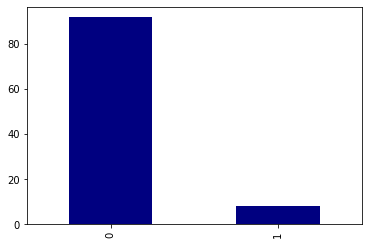

In [34]:
# Imbalance ratio

print((dframe['dframe'].value_counts()/len(dframe))*100)
((dframe['dframe'].value_counts()/len(dframe))*100).plot(kind="bar", color='navy')
plt.show()

Since 91.9% of the customers do not churn, there is a possibility of class imbalance.

As the churn variable is the target variable, all columns with September data can be dropped from the dataset.

In [35]:
# Dropping September data

cols_to_drop = [col for col in dframe.columns if '_9' in col]
print(cols_to_drop)

dframe.drop(cols_to_drop, axis=1, inplace=True)

dframe.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_data_rech_amt_9']


(29953, 138)

In [36]:
# Correlation for independant variables

dframe_corr = dframe.corr()
dframe_corr.loc[:,:] = np.tril(dframe_corr, k=-1)
dframe_corr = dframe_corr.stack()
dframe_corr
dframe_corr[(dframe_corr > 0.80) | (dframe_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8  arpu_8              0.955322
total_rech_amt_6  arpu_6              0.946104
total_rech_amt_7  arpu_7              0.943571
isd_og_mou_8      isd_og_mou_7        0.943120
                  isd_og_mou_6        0.918187
isd_og_mou_7      isd_og_mou_6        0.915247
total_ic_mou_6    loc_ic_mou_6        0.895048
total_ic_mou_8    loc_ic_mou_8        0.893145
total_ic_mou_7    loc_ic_mou_7        0.883002
std_og_t2t_mou_8  onnet_mou_8         0.860751
std_og_t2t_mou_7  onnet_mou_7         0.860360
std_og_t2t_mou_6  onnet_mou_6         0.859390
std_og_t2m_mou_7  offnet_mou_7        0.855012
std_og_t2m_mou_8  offnet_mou_8        0.851821
total_og_mou_8    std_og_mou_8        0.850958
total_og_mou_7    std_og_mou_7        0.849559
loc_ic_mou_8      loc_ic_t2m_mou_8    0.846893
std_ic_mou_8      std_ic_t2m_mou_8    0.845714
loc_ic_mou_6      loc_ic_t2m_mou_6    0.844164
loc_og_mou_8      loc_og_mou_7        0.841786
loc_ic_mou_8      loc_ic_mou_7        0.839872
loc_ic_mou_7 

## Data preparation

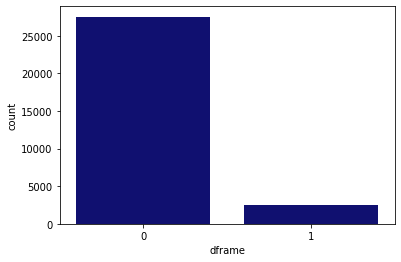

In [37]:
# Target Variable distribution

sns.countplot(x='dframe', data=dframe, color='navy')
plt.show()

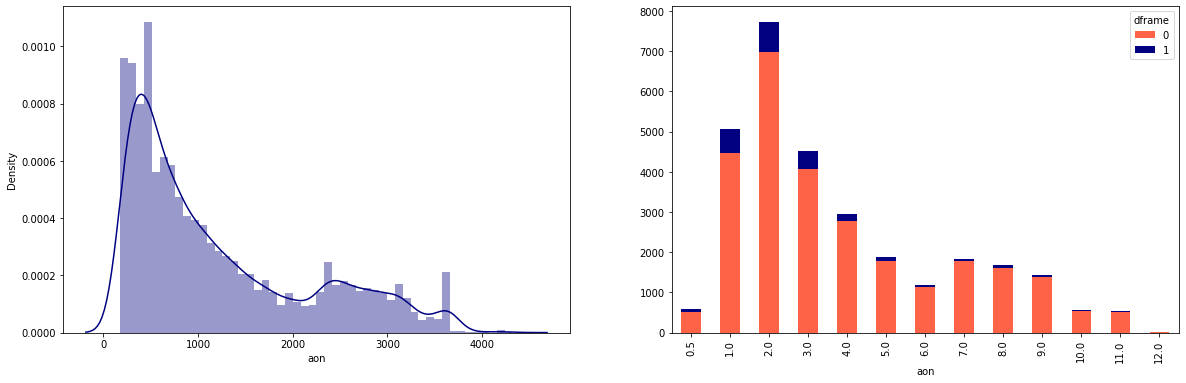

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# Distribution plot for aon

sns.distplot(dframe['aon'], ax=ax1, color='navy', kde=True)

# Bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pd.crosstab(pd.cut(round(((dframe['aon']/30)/12),1), bins = bins, labels = labels ), dframe['dframe']).plot(kind='bar', stacked=True, ax = ax2, color=['tomato', 'navy'])
plt.show()

The longer the age on network, the lower the counts are.

In [39]:
# Creating new variable
dframe['tenure'] = (dframe['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
dframe.drop('aon',axis=1, inplace=True)

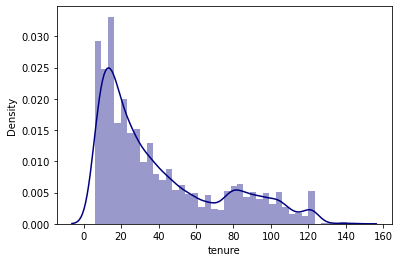

In [40]:
# Distribution

sns.distplot(dframe['tenure'],bins=40, color='navy')
plt.show()

In [41]:
tn_range = [0, 6, 12, 24, 60, 150]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
dframe['tenure_range'] = pd.cut(dframe['tenure'], tn_range, labels=tn_label)
dframe['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

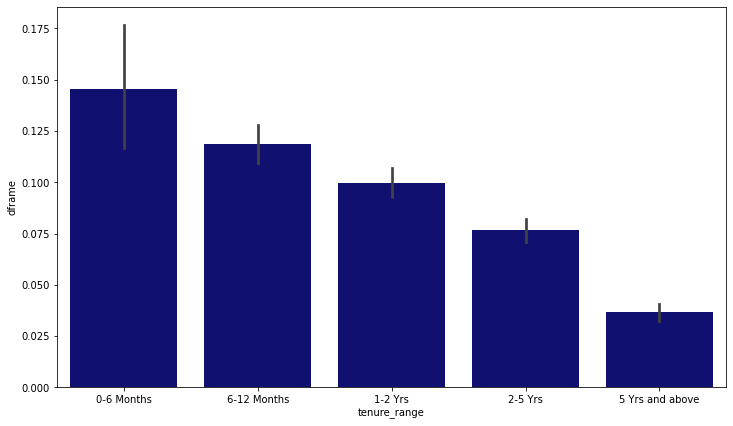

In [42]:
# Bar Plot

plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='dframe', data=dframe, color='navy')
plt.show()

Churn rate decreases as the duration of service increases

In [43]:
dframe.drop(['tenure_range'],axis=1, inplace=True)

In [44]:
# Box plot function

def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = dframe

    plt.subplot(2,3,1)
    plt.title("Plot for month_6")
    sns.boxplot(data=df, y=attribute+"_6",x="dframe",hue="dframe",
                showfliers=False,palette=("icefire"))
    plt.subplot(2,3,2)
    plt.title("Plot for month_7")
    sns.boxplot(data=df, y=attribute+"_7",x="dframe",hue="dframe",
                showfliers=False,palette=("icefire"))
    plt.subplot(2,3,3)
    plt.title("Plot for month_8")
    sns.boxplot(data=df, y=attribute+"_8",x="dframe",hue="dframe",
                showfliers=False,palette=("icefire"))
    plt.show()

In [45]:
def plot_mean_bar_chart(df,columns_list, colors=['navy', 'salmon']):
    df_0 = df[df.dframe==0].filter(columns_list)
    df_1 = df[df.dframe==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index=['Non Churn'])
    mean_df_1 = pd.DataFrame([df_1.mean()],index=['Churn'])

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(12,6),rot=0, color=colors)
    plt.show()

    return mean_bar

In [46]:
# Recharge amount

recharge_amnt =  dframe.columns[dframe.columns.str.contains('rech_amt')]
recharge_amnt.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_data_rech_amt_6',
 'total_data_rech_amt_7',
 'total_data_rech_amt_8']

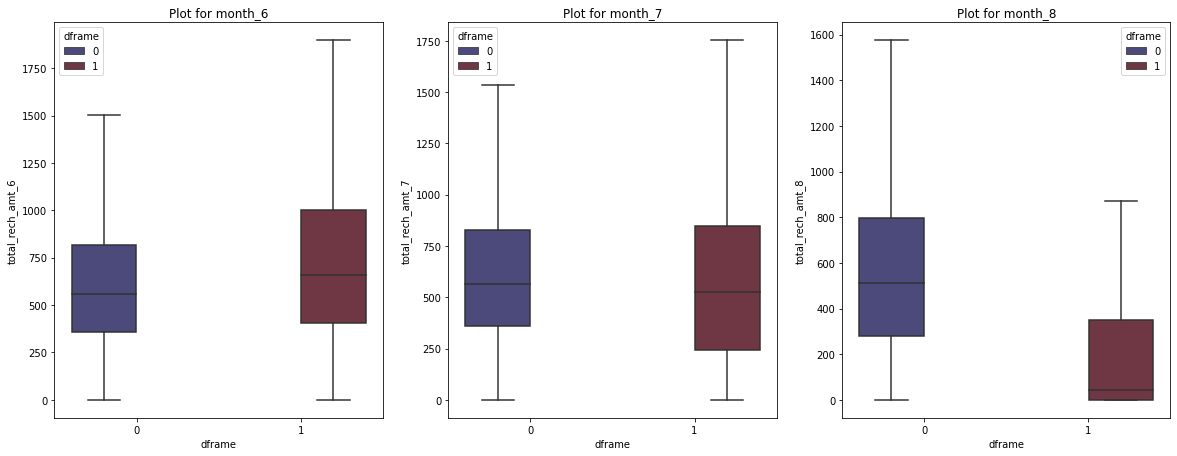

In [47]:
# Plot total recharge amount:

plot_box_chart('total_rech_amt')
plt.show()

There is a drop in the maximum recharge amount for churned customers in action phase

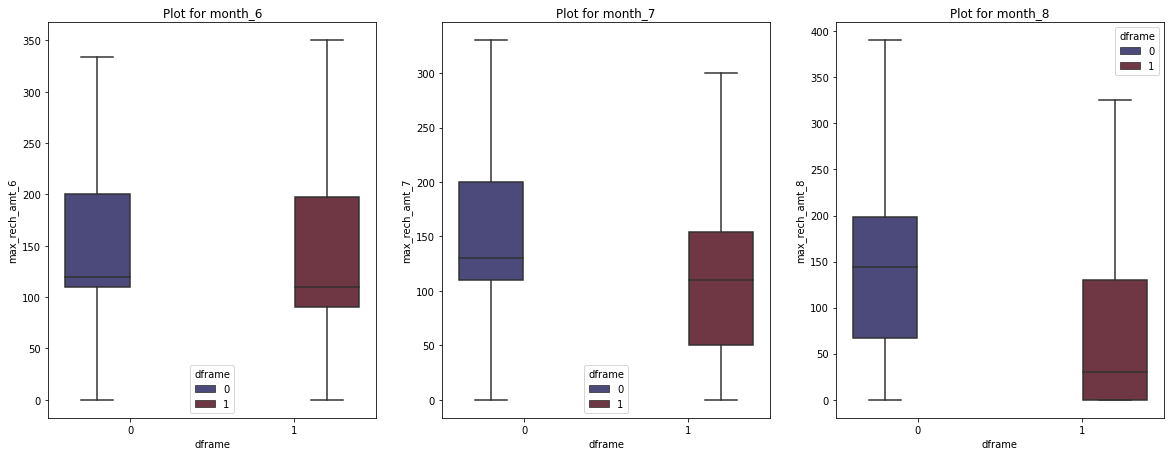

In [48]:
# Plot max recharge amount

plot_box_chart('max_rech_amt')
plt.show()

There is a drop in the maximum recharge amount for churned customers in action phase

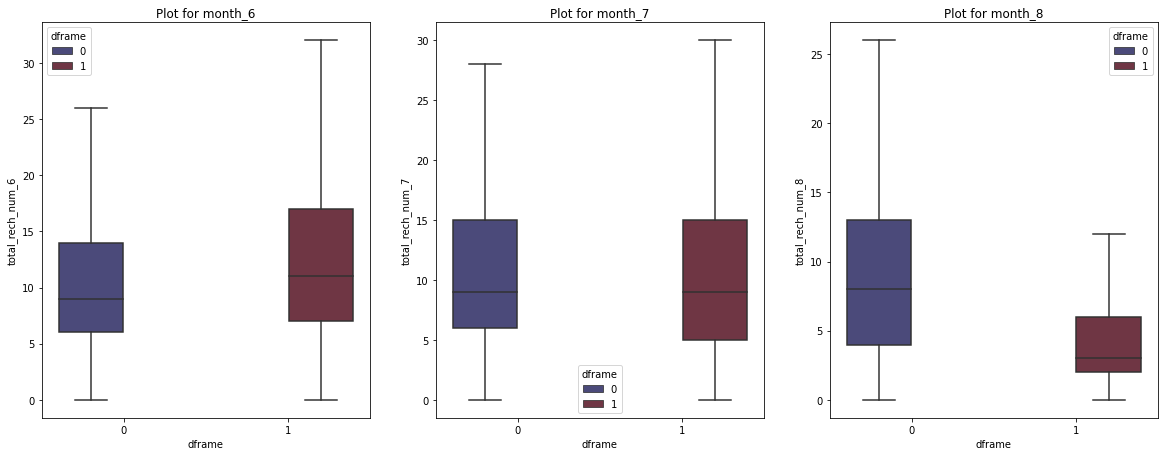

In [49]:
# Plot total number of recharges

plot_box_chart('total_rech_num')
plt.show()

Similarly there is a drop in number of recharges during Action phase

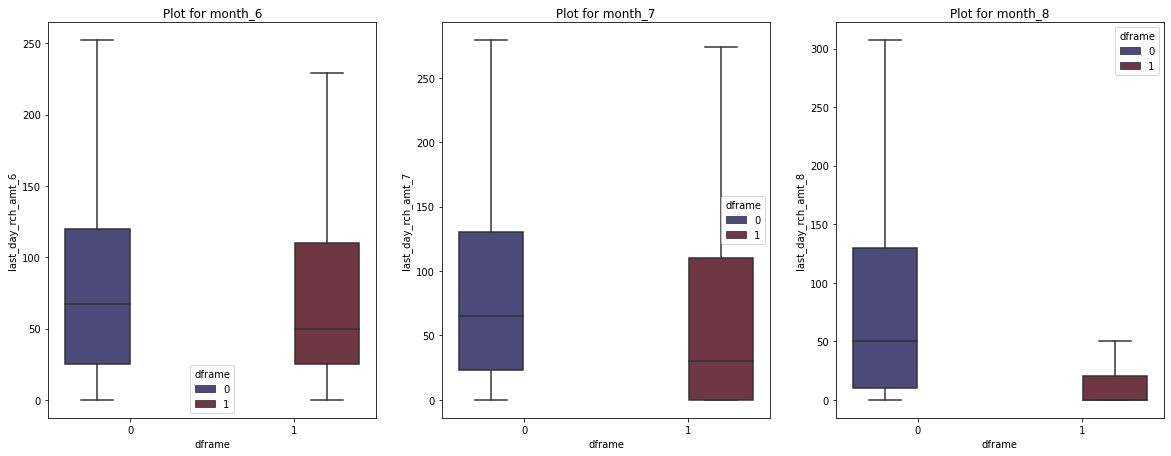

In [50]:
# Last day recharge amount

last_day_rech_amt = dframe.columns[dframe.columns.str.contains('day')]

# Plot

plot_box_chart('last_day_rch_amt')
plt.show()

Thr drop off continues to increase for churned customers in action phase. The drop is more significant for last day recharge amount.

In [51]:
# 2G & 3G usage related attributes

monthly_subcription_2g_3g = dframe.columns[dframe.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

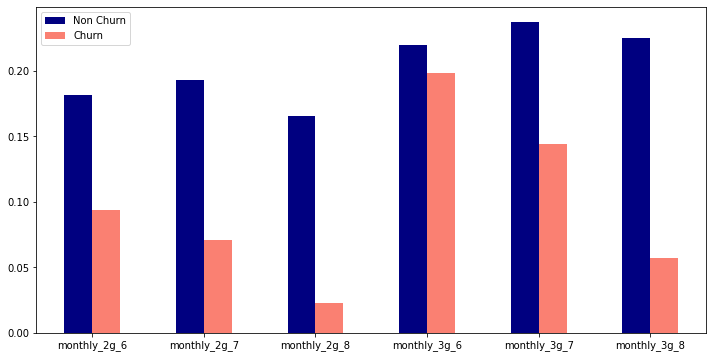

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.181613,0.193096,0.165080,0.219840,0.236882,0.224891
Churn,0.093711,0.071106,0.023017,0.198109,0.144266,0.057131


In [52]:
plot_mean_bar_chart(dframe, monthly_subcription_2g_3g)

Again we can see a drop in monthly subscriptions for churned customers in the Action phase.

#### Average Revenue Per User

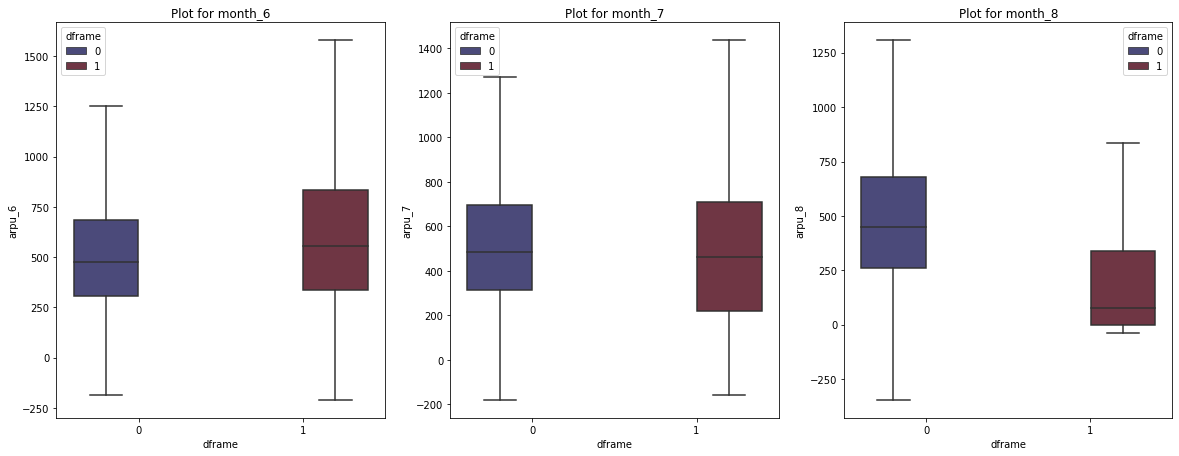

In [53]:
# Plot avg revenue per user

arpu_cols = dframe.columns[dframe.columns.str.contains('arpu_')]

plot_box_chart('arpu')

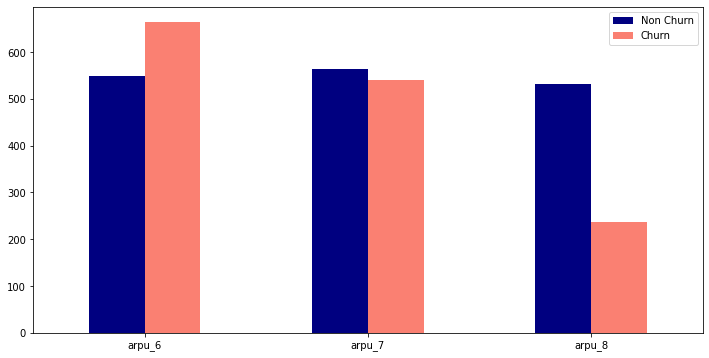

,arpu_6,arpu_7,arpu_8
Non Churn,549.546959,562.929990,532.869746
Churn,663.709368,541.146131,237.655478


In [54]:
plot_mean_bar_chart(dframe, arpu_cols)

We can see that huge drops in Average revenue per user in the Action phase for churned customers

In [55]:
mou_cols = dframe.columns[dframe.columns.str.contains('mou')]

mou_og_cols6 = dframe.columns[dframe.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [56]:
# Heatmap function

def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="mako",annot=True)
    plt.show()

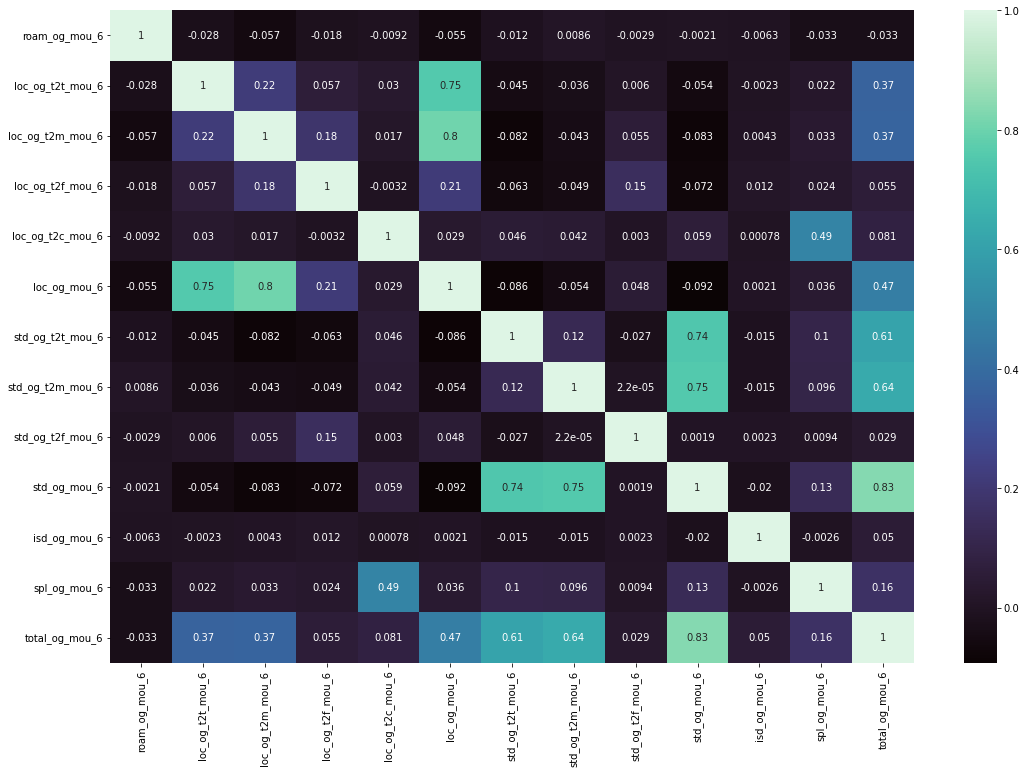

In [57]:
# Checking collinearity

heatmap(18,12,dframe.filter(mou_og_cols6))

There are several pairs of variables with high positive correlations:

*loc_og_t2t_mou_6 and loc_og_mou_6
*loc_og_t2m_mou_6 and loc_og_mou_6
*std_og_t2t_mou_6 and std_og_mou_6
*std_og_t2m_mou_6 and total_og_mou_6

loc_og_t2m_mou_6 and total_og_mou_6 are negatively correlated. Increase in local outgoing calls to mobile numbers might be associated with a decrease in total outgoing minutes.

In [58]:
# Check dependence of columns

print(dframe.loc[8,'total_og_mou_6'],"==",dframe.loc[8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())
print(dframe.loc[8,'std_og_mou_6'],"==",dframe.loc[8,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6']].sum())
print(dframe.loc[8,'loc_og_mou_6'],"==",dframe.loc[8,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6']].sum())

508.36 == 508.34999999999997
130.26 == 130.25
378.09 == 378.09


total_og_mou_6, std_og_mou_6 and loc_og_mou_6 are derived other variables present in the dataset. So we can remove these columns for all months from the data set.

In [59]:
list_total_og_cols = dframe.columns[dframe.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
dframe.drop(list_total_og_cols,axis=1,inplace=True)
def log(string):
    display(Markdown("> <span style='color:blue'>"+string+"</span>"))
log("Columns dropped - ")
list_total_og_cols.tolist()

> <span style='color:blue'>Columns dropped - </span>

['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

In [60]:
mou_ic_cols6 = dframe.columns[dframe.columns.str.contains('.*_ic_.*mou_6',regex=True)]

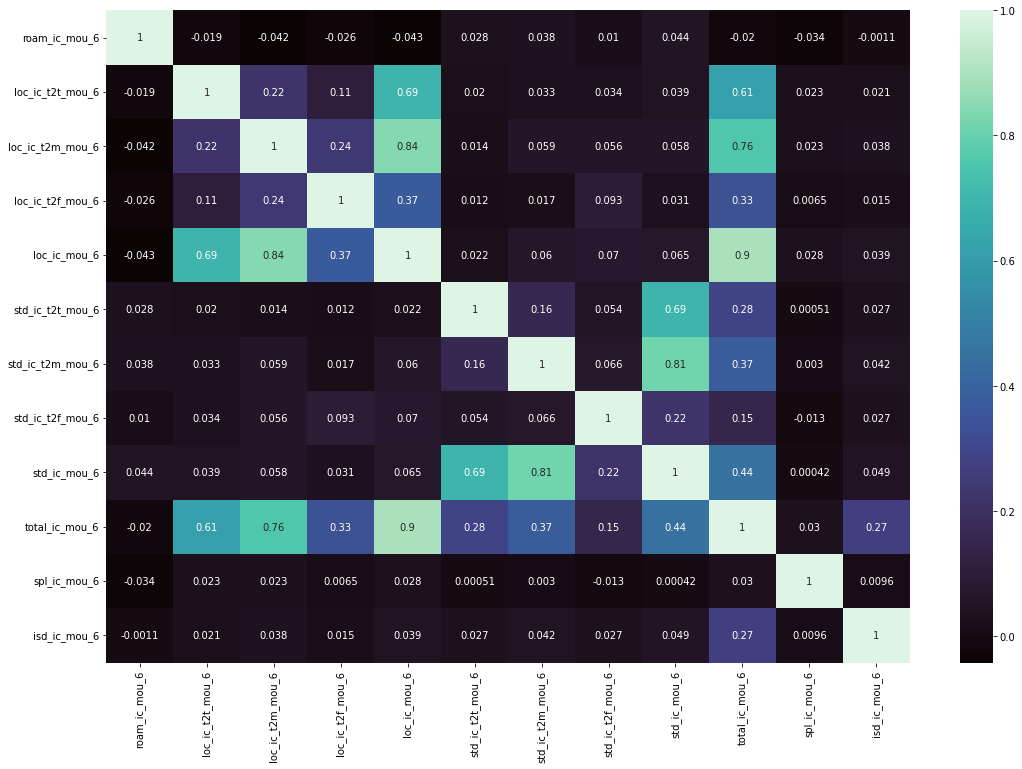

In [61]:
# Creating Heatmap to check colliniearity

heatmap(18,12,dframe.filter(mou_ic_cols6))

We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 seem to have a strong correlation with other fields and they need to be inspected to avoid any multicollinearity issues.

In [62]:
print(dframe.loc[21,'total_ic_mou_6'],"==",dframe.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(dframe.loc[21,'loc_ic_mou_6'],"==",dframe.loc[21,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']].sum())
print(dframe.loc[21,'std_ic_mou_6'],"==",dframe.loc[21,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6']].sum())

207.09 == 207.09
125.33 == 125.32000000000001
81.76 == 81.75


We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 are a combination of other variables present in the dataset. So we can remove these columns for all months from the data set

In [63]:
list_total_ic_cols = dframe.columns[dframe.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
dframe.drop(list_total_ic_cols,axis=1,inplace=True)
log("Columns dropped - ")
list_total_ic_cols.tolist()

> <span style='color:blue'>Columns dropped - </span>

['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [64]:
offnet_usage_service_col = dframe.columns[dframe.columns.str.contains('offnet.*mou',regex=True)]

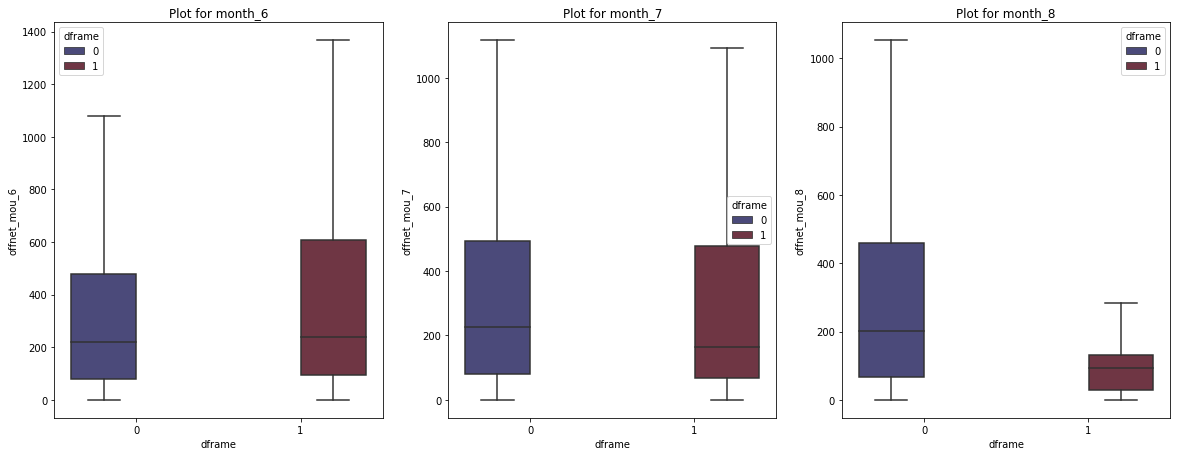

In [65]:
# Offnet mou values for churned and non churned customers

plot_box_chart('offnet_mou')

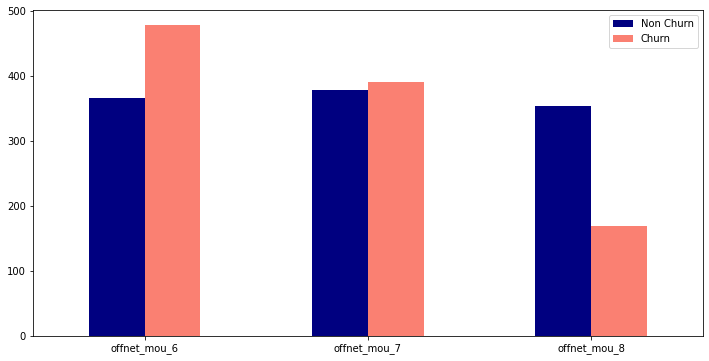

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,366.487934,378.948925,353.773024
Churn,477.967739,390.345980,168.554838


In [66]:
plot_mean_bar_chart(dframe, offnet_usage_service_col)

We can see the drop for offset mou services in the 8th month

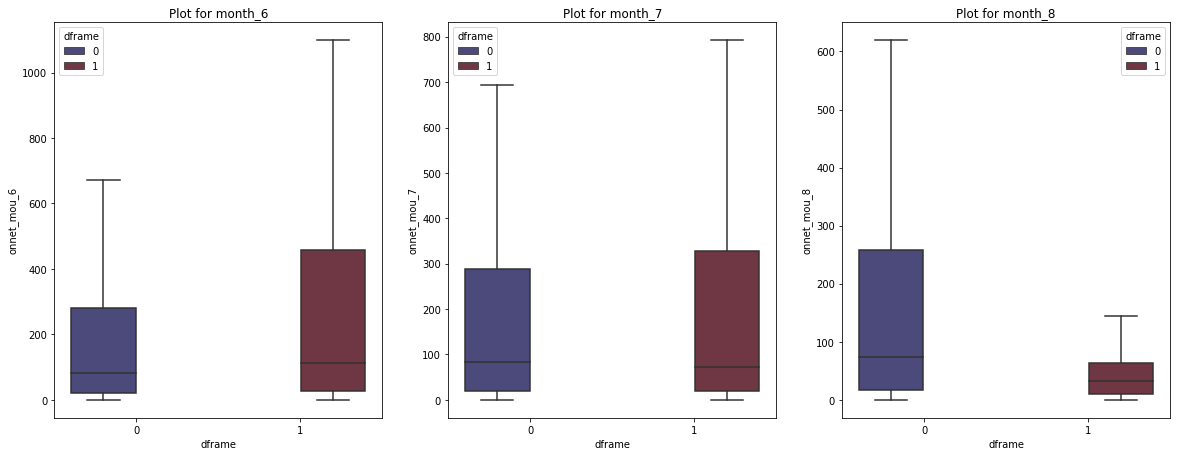

In [67]:
# Minutes of usage related columns

onnet_usage_service =  dframe.columns[dframe.columns.str.contains('^onnet.*mou',regex=True)]

# Plotting onnet
plot_box_chart('onnet_mou')

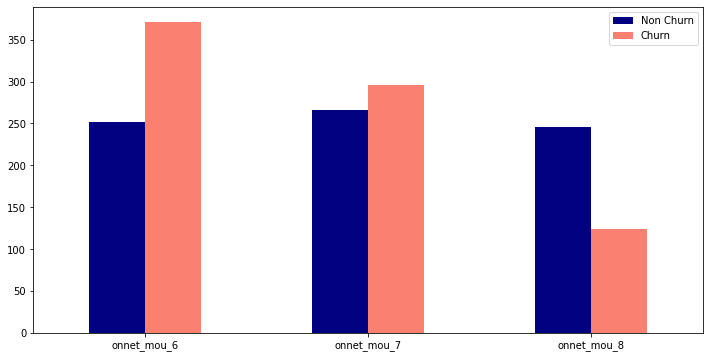

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,251.860341,266.237950,245.476590
Churn,370.802914,295.690259,124.025269


In [68]:
plot_mean_bar_chart(dframe, onnet_usage_service)

Onnet users drop in Action phase

In [69]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 120 entries, arpu_6 to tenure
dtypes: float64(89), int32(1), int64(24), object(6)
memory usage: 28.5+ MB


In [70]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',]

In [71]:
# Dummy variables
dummy_feature = pd.get_dummies(dframe[cat_cols], drop_first=False)

for col in cat_cols:
    dummy_feature.drop(col+"_-1", axis=1,inplace=True)

# Add to main DataFrame
dframe = pd.concat([dframe, dummy_feature], axis=1)

dframe.drop(cat_cols, axis=1,inplace=True)

dframe.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,dframe,tenure,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1,32.0,1,0,1,0,1,0,0,1,0,1,0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1,27.0,0,0,0,0,0,0,0,0,0,0,0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.040,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,154.0,23.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0.00,0.0,354.0,207.0,0,10.0,0,0,1,0,1,0,0,0,0,1,0,1
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.680,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.93,125.94,61.79,665.36,808.740,876.99,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.00,0.0,

### Derive the Custom variables

Difference between average of good phase and action phase

In [72]:
import regex
col_list = dframe.filter(regex='_6$|_7$|_8$').columns.str[:-2]
col_list.unique()

print ("Shape before adding derive variables : ",dframe.shape)

# Average
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av678"
    col_6 = col+"_6"
    col_7 = col+"_7"
    col_8 = col+"_8"
    dframe[avg_col_name] = dframe[col_8] - ((dframe[col_7] + dframe[col_8])/ 2)

print ("Shape after adding derive variables : ",dframe.shape)

Shape before adding derive variables :  (29953, 126)
Shape after adding derive variables :  (29953, 162)


### Outlier treatment

In [73]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [74]:
# Removing dummy variables

numerical_columns = [col for col in dframe.columns
                     if col not in list(list(dummy_feature.columns)
                                        + ['dframe'])]

# Outlier capping
dframe[numerical_columns] = dframe[numerical_columns].apply(cap_outliers, axis=0)

In [75]:
master_df = dframe.copy()

In [76]:
dframe['dframe'].value_counts()

0    27520
1     2433
Name: dframe, dtype: int64

# Model Building

In [77]:
# Class imbalance technique

X = dframe.drop("dframe", axis = 1)
Y = dframe['dframe']

adasyn = ADASYN(random_state=42)
X, Y = adasyn.fit_resample(X, Y)

In [78]:
# Checking imbalance

Y.value_counts()

0    27520
1    27258
Name: dframe, dtype: int64

### Train and Test split

In [79]:
# Split data (80:20)

y=Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4, stratify = y)


print("X train shape : {} | y train shape : {}".format(X_train.shape, y_train.shape))
print("X test shape : {} | y test shape : {}".format(X_test.shape, y_test.shape))

X train shape : (43822, 161) | y train shape : (43822,)
X test shape : (10956, 161) | y test shape : (10956,)


In [80]:
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(43822,)
(10956, 161)
(10956,)


### PCA :

In [81]:
# Apply pca to Train

pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

pca.fit(X_train)
dframe_pca = pca.fit_transform(X_train)

In [82]:
# Extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
variance_ratio = pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100)
print(variance_ratio)

0        8.75
1       16.17
2       20.56
3       24.39
4       28.08
5       31.11
6       33.66
7       36.04
8       38.34
9       40.41
10      42.36
11      44.15
12      45.89
13      47.53
14      49.08
15      50.58
16      52.05
17      53.41
18      54.72
19      55.96
20      57.19
21      58.36
22      59.50
23      60.63
24      61.73
25      62.81
26      63.87
27      64.88
28      65.87
29      66.83
30      67.78
31      68.71
32      69.62
33      70.52
34      71.38
35      72.21
36      73.02
37      73.82
38      74.58
39      75.34
40      76.06
41      76.77
42      77.46
43      78.14
44      78.81
45      79.47
46      80.10
47      80.72
48      81.32
49      81.93
50      82.51
51      83.08
52      83.65
53      84.19
54      84.72
55      85.23
56      85.74
57      86.24
58      86.73
59      87.20
60      87.66
61      88.11
62      88.55
63      88.97
64      89.38
65      89.79
66      90.18
67      90.55
68      90.92
69      91.28
70      91.62
71    

In [83]:
# PCA Components

pca.components_

array([[-8.57742385e-02, -7.97209992e-02,  8.09077200e-03, ...,
        -1.91362308e-02, -2.05831263e-02, -3.14705720e-02],
       [ 1.47842461e-01,  1.77241236e-01,  2.25037470e-01, ...,
         2.41591914e-02,  4.65368725e-02,  6.70209552e-02],
       [ 6.23576277e-02,  9.33677690e-02, -1.28604197e-01, ...,
        -1.36208687e-01, -5.46933134e-02, -1.08000989e-01],
       ...,
       [ 2.03467017e-02,  3.68684561e-01, -4.22593842e-01, ...,
         5.64975265e-03,  1.53946862e-05,  2.18970515e-04],
       [ 5.54923335e-03,  1.08282507e-02, -1.00186275e-02, ...,
         4.12349534e-03,  1.37839681e-03, -1.27120053e-03],
       [-3.94542582e-03,  6.69850042e-02, -8.18215326e-02, ...,
         1.22442994e-04,  1.25840476e-04, -1.32022060e-03]])

In [84]:
pca.explained_variance_ratio_

array([8.75390842e-02, 7.41209855e-02, 4.39688369e-02, 3.82347994e-02,
       3.69494196e-02, 3.02424227e-02, 2.55576795e-02, 2.38356826e-02,
       2.29738068e-02, 2.06491782e-02, 1.95155792e-02, 1.78736118e-02,
       1.74841096e-02, 1.63537688e-02, 1.54769802e-02, 1.50537277e-02,
       1.47091239e-02, 1.36108626e-02, 1.30340568e-02, 1.23954341e-02,
       1.22767905e-02, 1.17000826e-02, 1.14317684e-02, 1.13412774e-02,
       1.09828524e-02, 1.07426376e-02, 1.06225056e-02, 1.00944243e-02,
       9.90497695e-03, 9.58705087e-03, 9.53533771e-03, 9.30212752e-03,
       9.09120070e-03, 9.00603381e-03, 8.55450855e-03, 8.37991377e-03,
       8.07012862e-03, 7.96663253e-03, 7.66423996e-03, 7.53534336e-03,
       7.23267347e-03, 7.11532832e-03, 6.85409374e-03, 6.81932471e-03,
       6.75543807e-03, 6.59152729e-03, 6.27474377e-03, 6.17531908e-03,
       6.05458813e-03, 6.01907978e-03, 5.82377473e-03, 5.72712846e-03,
       5.68068773e-03, 5.43096799e-03, 5.24512916e-03, 5.17297003e-03,
      

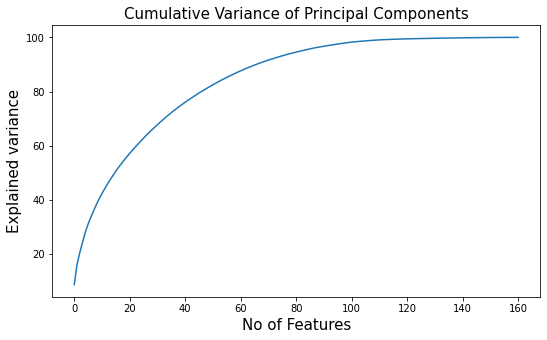

In [85]:
# Plot feature variance

features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20))
plt.title("Cumulative Variance of Principal Components",size=15)
plt.ylabel("Explained variance",size=15)
plt.xlabel("No of Features",size=15)
plt.plot(cumulative_variance)
plt.show()

In [86]:
# Creating empty List to store the model scores

model_score_list = []

In [87]:
# Function to evaluate model

def evaluate_model(actual, pred):

    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy : ',acc_score)

    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC: ',roc_score)

    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision: ', prec_score)

    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall: ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

### Perform the final PCA

In [88]:
# Perform final PCA with 65 components

from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=61)

X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

print("Train PCA data shape : ",X_train_pca.shape)
print("Test PCA data shape : ",X_test_pca.shape)

Train PCA data shape :  (43822, 61)
Test PCA data shape :  (10956, 61)


### Applying logistic regression on the Principal components

In [89]:
model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add the model scores to score list
model_score_list.append({'model_name':'LogisticRegression',
                        'acc_score':acc_score,
                        'roc_score':roc_score,
                        'precision_score':prec_score,
                        'recall_score':rec_score})

Accuracy :  80.63
ROC AUC:  80.63
Precision:  80.29
Recall:  80.94


### Logistic Regression with PCA

In [90]:
model = LogisticRegression(random_state=42)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add the model scores to score list
model_score_list.append({'model_name':'LogisticRegression with PCA',
                         'acc_score':acc_score,
                         'roc_score':roc_score,
                         'precision_score':prec_score,
                         'recall_score':rec_score})

Accuracy :  79.55
ROC AUC:  79.58
Precision:  76.69
Recall:  84.65


### Hyperparameter tuning - Logistic Regression with PCA

In [91]:
%%time

# PCA
pca = PCA()

logistic = LogisticRegression()

# Create pipeline
steps = [("scaler", StandardScaler()),
         ("pca", pca),
         ("logistic", logistic)
        ]

# Compile pipeline
pca_logistic = Pipeline(steps)

# Hyperparameter space
params = {'pca__n_components': [60, 80],
            'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
            'logistic__penalty': ['l1', 'l2']}

# Create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# Create gridsearch object
model_lr = GridSearchCV(estimator=pca_logistic,
                            cv=folds,
                            param_grid=params,
                            scoring='roc_auc',
                            n_jobs=-1, verbose=1,
                            return_train_score=True)

# Fit model
model_lr.fit(X_train_pca, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Wall time: 18.9 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [92]:
# Cross validation

pd.DataFrame(model_lr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.025400,0.022006,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.266002,0.036798,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.299002,0.076205,0.049200,0.004261,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.870719,0.871321,0.865364,0.871471,0.873235,0.870422,0.002664,8,0.869121,0.872838,0.873796,0.871179,0.872387,0.871864,0.001609
3,0.243999,0.007293,0.000000,0.000000,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.005401,0.084585,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.240802,0.046967,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.489602,0.095642,0.050200,0.005945,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.870728,0.871331,0.865376,0.871474,0.873233,0.870428,0.002661,7,0.869128,0.872848,0.873803,0.871188,0.872397,0.871873,0.001609
7,0.224000,0.004197,0.000000,0.000000,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.020460,0.055407,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.188856,0.026272,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Let's check the best hyperparameters

print("Best AUC: ", model_lr.best_score_)
print("Best hyperparameters: ", model_lr.best_params_)

Best AUC:  0.8704308442040212
Best hyperparameters:  {'logistic__C': 5, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [94]:
# Model with optimal hyperparameters

steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=60)),
         ("logistic", LogisticRegression(penalty='l2', random_state=42,C=10))
        ]
pipeline = Pipeline(steps)

# Fit model
pipeline.fit(X_train, y_train)

# Predict the testing pca data
y_pred = pipeline.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add the model scores to score list
model_score_list.append({'model_name':'LogisticRegression with PCA (Optimal Hyperparameters)',
                        'acc_score':acc_score,
                        'roc_score':roc_score,
                        'precision_score':prec_score,
                        'recall_score':rec_score})

Accuracy :  81.56
ROC AUC:  81.57
Precision:  80.46
Recall:  83.14


### RandomForest

In [95]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add model scores
model_score_list.append({'model_name':'RandomForestClassifier',
                        'acc_score':acc_score,
                        'roc_score':roc_score,
                        'precision_score':prec_score,
                        'recall_score':rec_score})

Accuracy :  97.17
ROC AUC:  97.17
Precision:  96.27
Recall:  98.11


### RandomForest with PCA

In [96]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add model scores
model_score_list.append({'model_name':'RandomForestClassifier with PCA',
                        'acc_score':acc_score, 'roc_score':roc_score,
                        'precision_score':prec_score,
                        'recall_score':rec_score})

Accuracy :  95.84
ROC AUC:  95.85
Precision:  94.24
Recall:  97.6


### Hyperparameter tuning - RandomForest

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform

# Create the RandomForestClassifier
forest = RandomForestClassifier(n_jobs=-1)

# Hyperparameter space
params = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(5, 50, 5),
    "min_samples_split": [2, 5, 10]
}

# Create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Create RandomizedSearchCV object
model_rf = RandomizedSearchCV(
    estimator=forest,
    param_distributions=params,
    n_iter=100,  # Number of parameter settings sampled
    cv=folds,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=4,
    return_train_score=True
)

In [98]:
# Fit model
model_rf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(5, 50, 5),
                                        'min_samples_split': [2, 5, 10]},
                   random_state=4, return_train_score=True, scoring='roc_auc',
                   verbose=1)

In [99]:
scores = model_rf.cv_results_
pd.DataFrame(model_rf.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.331082,2.430851,1.542201,1.292558,2,5,gini,"{'min_samples_split': 2, 'max_depth': 5, 'crit...",0.866997,0.869414,0.865376,0.872364,0.867264,0.868283,0.002412,50,0.875714,0.875778,0.877150,0.878236,0.875839,0.876543,0.001000
1,12.224156,1.831747,1.793454,1.092564,5,5,gini,"{'min_samples_split': 5, 'max_depth': 5, 'crit...",0.868203,0.869360,0.864858,0.870781,0.870256,0.868692,0.002107,49,0.876919,0.877029,0.876795,0.876247,0.878804,0.877159,0.000865
2,13.540381,0.736992,1.447480,0.609282,10,5,gini,"{'min_samples_split': 10, 'max_depth': 5, 'cri...",0.866201,0.870029,0.866030,0.869461,0.866191,0.867582,0.001776,52,0.876115,0.877238,0.877725,0.875601,0.875400,0.876416,0.000914
3,29.515183,3.362900,4.009380,1.693271,2,10,gini,"{'min_samples_split': 2, 'max_depth': 10, 'cri...",0.944778,0.941889,0.941069,0.943944,0.942197,0.942776,0.001372,43,0.966878,0.966710,0.967530,0.966527,0.966810,0.966891,0.000341
4,30.614528,2.659248,2.449163,1.528401,5,10,gini,"{'min_samples_split': 5, 'max_depth': 10, 'cri...",0.944598,0.943388,0.940104,0.944034,0.941643,0.942753,0.001655,44,0.966414,0.967166,0.967109,0.967091,0.965769,0.966710,0.000545


In [100]:
# Print hyperparameters

print("Best AUC: ", model_rf.best_score_)
print("Best hyperparameters: ", model_rf.best_params_)

Best AUC:  0.9896645233737006
Best hyperparameters:  {'min_samples_split': 2, 'max_depth': 45, 'criterion': 'entropy'}


In [101]:
# model with optimal hyperparameters
model = RandomForestClassifier(random_state=42,criterion='entropy',max_depth=35,min_samples_split=2 )

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

# Model Evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add model scores
model_score_list.append({'model_name':'RandomForestClassifier with PCA (Optimal Hyperparameters)',
                         'acc_score':acc_score,
                         'roc_score':roc_score,
                         'precision_score':prec_score,
                         'recall_score':rec_score})

Accuracy :  95.8
ROC AUC:  95.81
Precision:  93.8
Recall:  98.04


### Decision Tree

In [102]:
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add model scores
model_score_list.append({'model_name':'DecisionTreeClassifier',
                            'acc_score':acc_score,
                            'roc_score':roc_score,
                            'precision_score':prec_score,
                            'recall_score':rec_score})

Accuracy :  92.55
ROC AUC:  92.56
Precision:  91.83
Recall:  93.34


### Decision Tree with PCA

In [103]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add model scores
model_score_list.append({'model_name':'DecisionTreeClassifier with PCA',
                            'acc_score':acc_score,
                            'roc_score':roc_score,
                            'precision_score':prec_score,
                            'recall_score':rec_score})

Accuracy :  87.16
ROC AUC:  87.17
Precision:  84.8
Recall:  90.39


### Hyperparameter tuning - Decision Tree

In [104]:
param_dict = {
    "criterion": ['gini','entropy'],
    "max_depth": range(2,10,2),
    "min_samples_split": range(2,10,2),
    "min_samples_leaf": range(1,5)
}

decision_tree = DecisionTreeClassifier(random_state=42)

# Create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(decision_tree,
                                   param_distributions=param_dict,
                                   cv=folds,
                                   verbose=1,
                                   n_jobs=-1,
                                   scoring='roc_auc',
                                   return_train_score=True,
                                   random_state=42,
                                   n_iter=100)  # Number of parameter settings that are sampled

random_search.fit(X_train_pca, y_train)





Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 10, 2),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 10, 2)},
                   random_state=42, return_train_score=True, scoring='roc_auc',
                   verbose=1)

In [105]:
# Print optimal hyperparameters
print("Optimal AUC: ", random_search.best_score_)
print("Optimal hyperparameters: ", random_search.best_params_)

Optimal AUC:  0.8572678589700997
Optimal hyperparameters:  {'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 8, 'criterion': 'gini'}


In [106]:
random_search.cv_results_
pd.DataFrame(random_search.cv_results_).sort_values('mean_train_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
94,4.764452,0.052487,0.013001,1.097151e-03,2,1,8,gini,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.857657,0.857390,0.858959,0.853865,0.855866,0.856747,0.001745,12,0.889148,0.893295,0.893127,0.887332,0.890612,0.890703,0.002297
59,4.732235,0.047983,0.013200,4.000664e-04,4,1,8,gini,"{'min_samples_split': 4, 'min_samples_leaf': 1...",0.857588,0.857642,0.859533,0.853503,0.855866,0.856827,0.002027,9,0.889034,0.893264,0.893097,0.887329,0.890612,0.890667,0.002301
83,4.765901,0.086458,0.013600,1.019833e-03,6,1,8,gini,"{'min_samples_split': 6, 'min_samples_leaf': 1...",0.858008,0.857642,0.858879,0.853381,0.855323,0.856646,0.002012,15,0.888955,0.893264,0.893092,0.887288,0.890500,0.890620,0.002323
54,4.783415,0.048095,0.013400,7.997517e-04,4,2,8,gini,"{'min_samples_split': 4, 'min_samples_leaf': 2...",0.857826,0.858551,0.859381,0.853543,0.855687,0.856998,0.002118,6,0.888890,0.893088,0.892958,0.887182,0.890417,0.890507,0.002296
82,4.762487,0.057201,0.014200,7.486468e-04,6,2,8,gini,"{'min_samples_split': 6, 'min_samples_leaf': 2...",0.858210,0.858551,0.858987,0.853466,0.855238,0.856890,0.002161,8,0.888854,0.893088,0.892992,0.887162,0.890346,0.890488,0.002315
0,4.850002,0.078756,0.013200,4.002340e-04,8,2,8,gini,"{'min_samples_split': 8, 'min_samples_leaf': 2...",0.857858,0.858269,0.859064,0.853146,0.855360,0.856739,0.002182,13,0.888787,0.893003,0.892976,0.887102,0.890223,0.890418,0.002320
97,4.947454,0.235540,0.013600,1.019431e-03,4,3,8,gini,"{'min_samples_split': 4, 'min_samples_leaf': 3...",0.859085,0.858443,0.858593,0.853945,0.855336,0.857081,0.002051,3,0.888850,0.892952,0.892723,0.887040,0.890217,0.890356,0.002264
92,4.761603,0.057061,0.013000,1.095149e-03,6,3,8,gini,"{'min_samples_split': 6, 'min_samples_leaf': 3...",0.859085,0.858443,0.858593,0.853945,0.855336,0.857081,0.002051,3,0.888850,0.892952,0.892723,0.887040,0.890217,0.890356,0.002264
5,4.751472,0.025846,0.013000,6.324851e-04,2,3,8,gini,"{'min_samples_split': 2, 'min_samples_leaf': 3...",0.859085,0.858443,0.858593,0.853945,0.855336,0.857081,0.002051,3,0.888850,0.892952,0.892723,0.887040,0.890217,0.890356,0.002264
87,4.765642,0.073706,0.012400,4.896681e-04,4,4,8,gini,"{'min_samples_split': 4, 'min_samples_leaf': 4...",0.860160,0.857398,0.858428,0.854777,0.855577,0.857268,0.001939,1,0.888529,0.892606,0.892535,0.886793,0.889848,0.890062,0.002266


In [107]:
# Model with optimal Hyperparamters
model = DecisionTreeClassifier(criterion='entropy',
                                max_depth=8,
                                min_samples_leaf=4,
                                min_samples_split=2,
                                random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add model scores
model_score_list.append({'model_name':'DecisionTreeClassifier  with PCA(Optimal Hyperparameter)',
                            'acc_score':acc_score,
                            'roc_score':roc_score,
                            'precision_score':prec_score,
                            'recall_score':rec_score})

Accuracy :  89.7
ROC AUC:  89.71
Precision:  89.05
Recall:  90.43


### KNeighbors classifiers

In [108]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add model scores
model_score_list.append({'model_name':'KNeighborsClassifier',
                            'acc_score':acc_score,
                            'roc_score':roc_score,
                            'precision_score':prec_score,
                            'recall_score':rec_score})

Accuracy :  89.09
ROC AUC:  89.14
Precision:  82.07
Recall:  99.91


### KNeighbors classifiers with PCA

In [109]:
model = KNeighborsClassifier()

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add model scores
model_score_list.append({'model_name':'KNeighborsClassifier with PCA',
                            'acc_score':acc_score,
                            'roc_score':roc_score,
                            'precision_score':prec_score,
                            'recall_score':rec_score})

Accuracy :  89.14
ROC AUC:  89.19
Precision:  82.14
Recall:  99.89


### Hyperparameter tuning - KNeighbors classifiers

In [110]:
hyperparameters = dict(leaf_size=[20,30,40],
                       n_neighbors= [5,10,15],
                       p=[1, 2])

knn_2 = KNeighborsClassifier()

# Create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Use GridSearch
clf = GridSearchCV(estimator=knn_2,
                   param_grid=hyperparameters,
                   cv=folds,
                   verbose=1,
                   n_jobs=-1,
                   scoring='roc_auc',
                   return_train_score=True)

In [111]:
# Fit the model
knn_model = clf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [112]:
# print optimal hyperparameters

print("Optimal AUC: ", knn_model.best_score_)
print("Optimal hyperparameters: ", knn_model.best_params_)

Optimal AUC:  0.9633875187371437
Optimal hyperparameters:  {'leaf_size': 20, 'n_neighbors': 10, 'p': 1}


In [113]:
# Model with optimal Hyperparamters
model = KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add model scores
model_score_list.append({'model_name':'KNeighborsClassifier with PCA(Optimal Hyperparameter)',
                         'acc_score':acc_score,
                         'roc_score':roc_score,
                         'precision_score':prec_score,
                         'recall_score':rec_score})

Accuracy :  87.95
ROC AUC:  88.01
Precision:  80.54
Recall:  99.93


### AdaBoost

In [114]:
model = AdaBoostClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add model scores
model_score_list.append({'model_name':'AdaBoostClassifier',
                         'acc_score':acc_score,
                         'roc_score':roc_score,
                         'precision_score':prec_score,
                         'recall_score':rec_score})

Accuracy :  90.88
ROC AUC:  90.88
Precision:  91.19
Recall:  90.41


### AdaBoost with PCA

In [115]:
model = AdaBoostClassifier(random_state=42)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add model scores
model_score_list.append({'model_name':'AdaBoostClassifier with PCA',
                         'acc_score':acc_score,
                         'roc_score':roc_score,
                         'precision_score':prec_score,
                         'recall_score':rec_score})

Accuracy :  78.87
ROC AUC:  78.88
Precision:  78.11
Recall:  79.93


### RidgeClassifier

In [116]:
model = RidgeClassifier(class_weight='balanced', random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add model scores
model_score_list.append({'model_name':'RidgeClassifier',
                         'acc_score':acc_score,
                         'roc_score':roc_score,
                         'precision_score':prec_score,
                         'recall_score':rec_score})

Accuracy :  83.46
ROC AUC:  83.47
Precision:  81.58
Recall:  86.24


### RidgeClassifier with PCA

In [117]:
model = RidgeClassifier(class_weight='balanced', random_state=42)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add model scores
model_score_list.append({'model_name':'RidgeClassifier with PCA',
                         'acc_score':acc_score,
                         'roc_score':roc_score,
                         'precision_score':prec_score,
                         'recall_score':rec_score})

Accuracy :  79.36
ROC AUC:  79.38
Precision:  77.34
Recall:  82.78


### GradientBoosting

In [118]:
model = GradientBoostingClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

model_score_list.append({'model_name':'GradientBoostingClassifier',
                         'acc_score':acc_score,
                         'roc_score':roc_score,
                         'precision_score':prec_score,
                         'recall_score':rec_score})

Accuracy :  93.12
ROC AUC:  93.12
Precision:  92.96
Recall:  93.23


### GradientBoosting with PCA

In [119]:
# initialize the GradientBoosting
model = GradientBoostingClassifier(random_state=42)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# Add model scores
model_score_list.append({'model_name':'GradientBoostingClassifier with PCA',
                         'acc_score':acc_score,
                         'roc_score':roc_score,
                         'precision_score':prec_score,
                         'recall_score':rec_score})

Accuracy :  83.16
ROC AUC:  83.16
Precision:  82.38
Recall:  84.15


### SVC

In [120]:
model = SVC(kernel='rbf', random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

model_score_list.append({'model_name':'SVC_Kernel_rbf',
                         'acc_score':acc_score,
                         'roc_score':roc_score,
                         'precision_score':prec_score,
                         'recall_score':rec_score})

Accuracy :  85.59
ROC AUC:  85.59
Precision:  84.61
Recall:  86.83


### SVC with PCA

In [121]:
model = SVC(kernel='rbf', random_state=42)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

model_score_list.append({'model_name':'SVC_Kernel_rbf with PCA',
                         'acc_score':acc_score,
                         'roc_score':roc_score,
                         'precision_score':prec_score,
                         'recall_score':rec_score})

Accuracy :  86.67
ROC AUC:  86.68
Precision:  85.29
Recall:  88.48


### Model Comparison

In [122]:
# Model scores -> Dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name',
                                                        'acc_score',
                                                        'roc_score',
                                                        'precision_score',
                                                        'recall_score'])

# Sort by descending
model_score_df.sort_values(['recall_score','roc_score'], ascending=False)

,model_name,acc_score,roc_score,precision_score,recall_score
11,KNeighborsClassifier with PCA(Optimal Hyperpar...,87.95,88.01,80.54,99.93
9,KNeighborsClassifier,89.09,89.14,82.07,99.91
10,KNeighborsClassifier with PCA,89.14,89.19,82.14,99.89
3,RandomForestClassifier,97.17,97.17,96.27,98.11
5,RandomForestClassifier with PCA (Optimal Hyper...,95.80,95.81,93.80,98.04
4,RandomForestClassifier with PCA,95.84,95.85,94.24,97.60
6,DecisionTreeClassifier,92.55,92.56,91.83,93.34
16,GradientBoostingClassifier,93.12,93.12,92.96,93.23
8,DecisionTreeClassifier with PCA(Optimal Hyper...,89.70,89.71,89.05,90.43
12,AdaBoostClassifier,90.88,90.88,91.19,90.41


The best model is the RandomForestClassifier with an accuracy of 97.17%, precision of 96.27%, and recall of 98.11%.

# Interpretable Model

Logistic regression without PCA

In [123]:
# Scale test

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

In [124]:
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [125]:
%%time

logreg = LogisticRegression()

# RFE

rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

Wall time: 2min 48s


In [126]:
# LRFE select features

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 134),
 ('arpu_7', True, 1),
 ('arpu_8', False, 39),
 ('onnet_mou_6', False, 114),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 137),
 ('offnet_mou_6', False, 115),
 ('offnet_mou_7', False, 66),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 138),
 ('roam_ic_mou_7', False, 87),
 ('roam_ic_mou_8', False, 86),
 ('roam_og_mou_6', False, 82),
 ('roam_og_mou_7', False, 22),
 ('roam_og_mou_8', False, 21),
 ('loc_og_t2t_mou_6', False, 121),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', False, 125),
 ('loc_og_t2m_mou_6', False, 78),
 ('loc_og_t2m_mou_7', False, 72),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 120),
 ('loc_og_t2f_mou_7', False, 4),
 ('loc_og_t2f_mou_8', False, 6),
 ('loc_og_t2c_mou_6', False, 96),
 ('loc_og_t2c_mou_7', False, 119),
 ('loc_og_t2c_mou_8', False, 95),
 ('std_og_t2t_mou_6', False, 105),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', False, 90),
 ('std_og_t2m_mou_6', False, 83),
 ('std_og_t2m_mou_7', Fal

In [127]:
# RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['arpu_7', 'onnet_mou_7', 'offnet_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_7', 'std_og_t2m_mou_8',
       'loc_ic_t2m_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_6', 'max_rech_data_8',
       'sachet_2g_6', 'sep_vbc_3g', 'night_pck_user_6_0.0', 'fb_user_8_1.0',
       'avg_onnet_mou_av678', 'avg_loc_og_t2t_mou_av678',
       'avg_std_og_t2t_mou_av678'],
      dtype='object')

We have selected variables using RFE. Since p-values and VIFs are important, we will use these variables to create a logistic regression model with statsmodels.

### Model: 1

In [128]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 dframe   No. Observations:                43822
Model:                            GLM   Df Residuals:                    43801
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18167.
Date:                Sun, 11 Aug 2024   Deviance:                       36334.
Time:                        19:01:47   Pearson chi2:                 6.49e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4272
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2847      0.016    -18.360      0.000      -0.315      -0.254
arpu_7                       0.3714      0.020     18.769      0.000       0.333       0.410
onnet_mou_7                  0.8109      0.088      9.181      0.000       0.638       0.984
offnet_mou_8                 0.8111      0.064     12.661      0.000       0.686       0.937
loc_og_t2t_mou_7            -0.7961      0.044    -18.266      0.000      -0.881      -0.711
loc_og_t2m_mou_8            -0.8895      0.041    -21.722      0.000      -0.970      -0.809
std_og_t2t_mou_7            -1.0698      0.083    -12.898      0.000      -1.232      -0.907
std_og_t2m_mou_8            -0.8517      0.053    -16.202      0.000      -0.955      -0.749
loc_ic_t2m_mou_8            -0.4997      0.026    -19.487      0.000      -0.550      -0.449
spl_ic_mou_8                -0.3753      0.019    -20.266      0.000      -0.412      -0.339
total_rech_num_8            -0.4485      0.018    -24.761      0.000      -0.484      -0.413
last_day_rch_amt_8          -0.5480      0.016    -34.198      0.000      -0.579      -0.517
max_rech_data_6              0.4926      0.024     20.244      0.000       0.445       0.540
max_rech_data_8              0.2608      0.025     10.325      0.000       0.211       0.310
sachet_2g_6                  0.4281      0.019     22.758      0.000       0.391       0.465
sep_vbc_3g                  -0.6567      0.045    -14.515      0.000      -0.745      -0.568
night_pck_user_6_0.0        -0.6018      0.024    -24.593      0.000      -0.650      -0.554
fb_user_8_1.0               -1.1547      0.025    -46.578      0.000      -1.203      -1.106
avg_onnet_mou_av678          0.7391      0.076      9.670      0.000       0.589       0.889
avg_loc_og_t2t_mou_av678    -0.6827      0.036    -19.082      0.000      -0.753      -0.613
avg_std_og_t2t_mou_av678    -0.9277      0.071    -13.156      0.000      -1.066      -0.790
============================================================================================
"""

In [129]:
# FVIF Calculation

def Calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [130]:
# Check VIF

Calculate_VIF(X_train[col])

,Features,VIF
1,onnet_mou_7,32.42
5,std_og_t2t_mou_7,28.86
17,avg_onnet_mou_av678,24.00
19,avg_std_og_t2t_mou_av678,20.61
2,offnet_mou_8,15.23
6,std_og_t2m_mou_8,10.39
3,loc_og_t2t_mou_7,6.17
4,loc_og_t2m_mou_8,5.88
18,avg_loc_og_t2t_mou_av678,3.99
12,max_rech_data_8,3.32


### Model: 2

In [131]:
# Dropping column due to high VIF

col = col.drop('onnet_mou_7', 1)
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 dframe   No. Observations:                43822
Model:                            GLM   Df Residuals:                    43802
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18210.
Date:                Sun, 11 Aug 2024   Deviance:                       36421.
Time:                        19:01:51   Pearson chi2:                 6.35e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4260
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2881      0.016    -18.578      0.000      -0.318      -0.258
arpu_7                       0.3905      0.020     19.799      0.000       0.352       0.429
offnet_mou_8                 0.9209      0.063     14.596      0.000       0.797       1.045
loc_og_t2t_mou_7            -0.4943      0.028    -17.890      0.000      -0.548      -0.440
loc_og_t2m_mou_8            -0.9745      0.040    -24.230      0.000      -1.053      -0.896
std_og_t2t_mou_7            -0.3287      0.019    -17.748      0.000      -0.365      -0.292
std_og_t2m_mou_8            -0.9575      0.051    -18.614      0.000      -1.058      -0.857
loc_ic_t2m_mou_8            -0.5127      0.026    -19.923      0.000      -0.563      -0.462
spl_ic_mou_8                -0.3792      0.019    -20.461      0.000      -0.416      -0.343
total_rech_num_8            -0.4348      0.018    -24.167      0.000      -0.470      -0.400
last_day_rch_amt_8          -0.5430      0.016    -34.025      0.000      -0.574      -0.512
max_rech_data_6              0.4957      0.024     20.393      0.000       0.448       0.543
max_rech_data_8              0.2574      0.025     10.199      0.000       0.208       0.307
sachet_2g_6                  0.4282      0.019     22.803      0.000       0.391       0.465
sep_vbc_3g                  -0.6610      0.045    -14.565      0.000      -0.750      -0.572
night_pck_user_6_0.0        -0.6004      0.024    -24.566      0.000      -0.648      -0.553
fb_user_8_1.0               -1.1593      0.025    -46.807      0.000      -1.208      -1.111
avg_onnet_mou_av678          0.3799      0.063      6.052      0.000       0.257       0.503
avg_loc_og_t2t_mou_av678    -0.5688      0.033    -17.425      0.000      -0.633      -0.505
avg_std_og_t2t_mou_av678    -0.6018      0.058    -10.294      0.000      -0.716      -0.487
============================================================================================
"""

In [132]:
# Check VIF

Calculate_VIF(X_train[col])

,Features,VIF
16,avg_onnet_mou_av678,20.13
18,avg_std_og_t2t_mou_av678,17.43
1,offnet_mou_8,14.74
5,std_og_t2m_mou_8,9.91
3,loc_og_t2m_mou_8,5.58
17,avg_loc_og_t2t_mou_av678,3.56
11,max_rech_data_8,3.32
14,night_pck_user_6_0.0,3.22
15,fb_user_8_1.0,3.05
10,max_rech_data_6,2.97


### Model: 3

In [133]:
# Dropping column due to high VIF

col = col.drop('avg_onnet_mou_av678', 1)
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 dframe   No. Observations:                43822
Model:                            GLM   Df Residuals:                    43803
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18229.
Date:                Sun, 11 Aug 2024   Deviance:                       36458.
Time:                        19:01:54   Pearson chi2:                 6.19e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4255
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2885      0.015    -18.616      0.000      -0.319      -0.258
arpu_7                       0.3772      0.020     19.277      0.000       0.339       0.416
offnet_mou_8                 0.9641      0.063     15.406      0.000       0.841       1.087
loc_og_t2t_mou_7            -0.5157      0.028    -18.480      0.000      -0.570      -0.461
loc_og_t2m_mou_8            -0.9897      0.040    -24.666      0.000      -1.068      -0.911
std_og_t2t_mou_7            -0.3248      0.019    -17.539      0.000      -0.361      -0.288
std_og_t2m_mou_8            -0.9914      0.051    -19.409      0.000      -1.092      -0.891
loc_ic_t2m_mou_8            -0.5099      0.026    -19.855      0.000      -0.560      -0.460
spl_ic_mou_8                -0.3803      0.019    -20.540      0.000      -0.417      -0.344
total_rech_num_8            -0.4271      0.018    -23.873      0.000      -0.462      -0.392
last_day_rch_amt_8          -0.5397      0.016    -33.871      0.000      -0.571      -0.508
max_rech_data_6              0.4959      0.024     20.399      0.000       0.448       0.543
max_rech_data_8              0.2584      0.025     10.244      0.000       0.209       0.308
sachet_2g_6                  0.4271      0.019     22.759      0.000       0.390       0.464
sep_vbc_3g                  -0.6588      0.045    -14.557      0.000      -0.748      -0.570
night_pck_user_6_0.0        -0.5983      0.024    -24.494      0.000      -0.646      -0.550
fb_user_8_1.0               -1.1628      0.025    -46.974      0.000      -1.211      -1.114
avg_loc_og_t2t_mou_av678    -0.4602      0.027    -16.836      0.000      -0.514      -0.407
avg_std_og_t2t_mou_av678    -0.2662      0.018    -14.568      0.000      -0.302      -0.230
============================================================================================
"""

In [134]:
# Check VIF

Calculate_VIF(X_train[col])

,Features,VIF
1,offnet_mou_8,14.47
5,std_og_t2m_mou_8,9.74
3,loc_og_t2m_mou_8,5.52
11,max_rech_data_8,3.32
14,night_pck_user_6_0.0,3.22
15,fb_user_8_1.0,3.05
10,max_rech_data_6,2.97
4,std_og_t2t_mou_7,2.06
6,loc_ic_t2m_mou_8,1.96
17,avg_std_og_t2t_mou_av678,1.81


### Model: 4

In [135]:
# Dropping column due to high VIF

col = col.drop('offnet_mou_8', 1)
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 dframe   No. Observations:                43822
Model:                            GLM   Df Residuals:                    43804
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18359.
Date:                Sun, 11 Aug 2024   Deviance:                       36718.
Time:                        19:01:57   Pearson chi2:                 7.16e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4221
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2967      0.015    -19.182      0.000      -0.327      -0.266
arpu_7                       0.4672      0.019     24.932      0.000       0.430       0.504
loc_og_t2t_mou_7            -0.5404      0.028    -19.318      0.000      -0.595      -0.486
loc_og_t2m_mou_8            -0.5396      0.026    -20.609      0.000      -0.591      -0.488
std_og_t2t_mou_7            -0.3918      0.018    -21.690      0.000      -0.427      -0.356
std_og_t2m_mou_8            -0.2468      0.015    -16.787      0.000      -0.276      -0.218
loc_ic_t2m_mou_8            -0.5470      0.026    -21.051      0.000      -0.598      -0.496
spl_ic_mou_8                -0.3910      0.019    -21.102      0.000      -0.427      -0.355
total_rech_num_8            -0.4048      0.018    -22.987      0.000      -0.439      -0.370
last_day_rch_amt_8          -0.5110      0.016    -32.767      0.000      -0.542      -0.480
max_rech_data_6              0.4958      0.024     20.487      0.000       0.448       0.543
max_rech_data_8              0.2524      0.025     10.057      0.000       0.203       0.302
sachet_2g_6                  0.4255      0.019     22.794      0.000       0.389       0.462
sep_vbc_3g                  -0.6593      0.045    -14.710      0.000      -0.747      -0.571
night_pck_user_6_0.0        -0.5947      0.024    -24.416      0.000      -0.642      -0.547
fb_user_8_1.0               -1.1835      0.025    -48.015      0.000      -1.232      -1.135
avg_loc_og_t2t_mou_av678    -0.4532      0.027    -16.569      0.000      -0.507      -0.400
avg_std_og_t2t_mou_av678    -0.2857      0.018    -15.640      0.000      -0.322      -0.250
============================================================================================
"""

In [136]:
# Check VIF

Calculate_VIF(X_train[col])

,Features,VIF
10,max_rech_data_8,3.32
13,night_pck_user_6_0.0,3.22
14,fb_user_8_1.0,3.04
9,max_rech_data_6,2.97
2,loc_og_t2m_mou_8,2.20
3,std_og_t2t_mou_7,1.98
5,loc_ic_t2m_mou_8,1.95
16,avg_std_og_t2t_mou_av678,1.80
11,sachet_2g_6,1.73
0,arpu_7,1.67


### Model: 5

In [137]:
# Dropping column due to high VIF

col = col.drop('max_rech_data_8', 1)
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 dframe   No. Observations:                43822
Model:                            GLM   Df Residuals:                    43805
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18410.
Date:                Sun, 11 Aug 2024   Deviance:                       36820.
Time:                        19:01:59   Pearson chi2:                 6.86e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4208
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2905      0.015    -18.819      0.000      -0.321      -0.260
arpu_7                       0.4846      0.019     25.852      0.000       0.448       0.521
loc_og_t2t_mou_7            -0.5403      0.028    -19.314      0.000      -0.595      -0.485
loc_og_t2m_mou_8            -0.5415      0.026    -20.694      0.000      -0.593      -0.490
std_og_t2t_mou_7            -0.3918      0.018    -21.727      0.000      -0.427      -0.356
std_og_t2m_mou_8            -0.2452      0.015    -16.696      0.000      -0.274      -0.216
loc_ic_t2m_mou_8            -0.5511      0.026    -21.208      0.000      -0.602      -0.500
spl_ic_mou_8                -0.3931      0.019    -21.212      0.000      -0.429      -0.357
total_rech_num_8            -0.4172      0.018    -23.805      0.000      -0.452      -0.383
last_day_rch_amt_8          -0.4911      0.016    -31.625      0.000      -0.522      -0.461
max_rech_data_6              0.5890      0.023     25.996      0.000       0.545       0.633
sachet_2g_6                  0.3974      0.018     21.924      0.000       0.362       0.433
sep_vbc_3g                  -0.6678      0.045    -14.825      0.000      -0.756      -0.579
night_pck_user_6_0.0        -0.6196      0.024    -25.617      0.000      -0.667      -0.572
fb_user_8_1.0               -1.0111      0.017    -59.437      0.000      -1.044      -0.978
avg_loc_og_t2t_mou_av678    -0.4498      0.027    -16.451      0.000      -0.503      -0.396
avg_std_og_t2t_mou_av678    -0.2824      0.018    -15.493      0.000      -0.318      -0.247
============================================================================================
"""

In [138]:
# Check VIF

Calculate_VIF(X_train[col])

,Features,VIF
12,night_pck_user_6_0.0,3.17
9,max_rech_data_6,2.55
2,loc_og_t2m_mou_8,2.20
3,std_og_t2t_mou_7,1.98
5,loc_ic_t2m_mou_8,1.94
15,avg_std_og_t2t_mou_av678,1.80
10,sachet_2g_6,1.71
1,loc_og_t2t_mou_7,1.66
0,arpu_7,1.65
7,total_rech_num_8,1.65


**This model has P-Value < 0.05 & RFE < 5. So this is chosen as the final model.**

In [139]:
# Creating dataframe with probabilities

y_train_pred= pd.DataFrame({'Churn_actual':y_train.values,'Churn_Prob': res.predict(X_train_sm)})
y_train_pred.head()

,Churn_actual,Churn_Prob
51763,1,0.218392
831,0,0.008565
8333,0,0.103721
15757,0,0.258150
40767,1,0.362216


In [140]:
# Column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred['predicted'] = y_train_pred.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred.head()

print(accuracy_score(y_train_pred.Churn_actual, y_train_pred.predicted))

0.8134270457760941


In [141]:
# Generating columns based on varying probability cutoffs.

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,Churn_actual,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
51763,1,0.218392,0,1,1,1,0,0,0,0,0,0,0
831,0,0.008565,0,1,0,0,0,0,0,0,0,0,0
8333,0,0.103721,0,1,1,0,0,0,0,0,0,0,0
15757,0,0.258150,0,1,1,1,0,0,0,0,0,0,0
40767,1,0.362216,0,1,1,1,1,0,0,0,0,0,0


In [142]:
# Calculate accuracy, sensitivity, specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred.Churn_actual, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.497604  1.000000  0.000000
0.1   0.1  0.673726  0.982757  0.367642
0.2   0.2  0.742709  0.950105  0.537291
0.3   0.3  0.780727  0.910896  0.651799
0.4   0.4  0.800831  0.864441  0.737827
0.5   0.5  0.813427  0.826103  0.800872
0.6   0.6  0.818425  0.782812  0.853697
0.7   0.7  0.808293  0.718472  0.897257
0.8   0.8  0.756424  0.571448  0.939635
0.9   0.9  0.600087  0.213794  0.982694


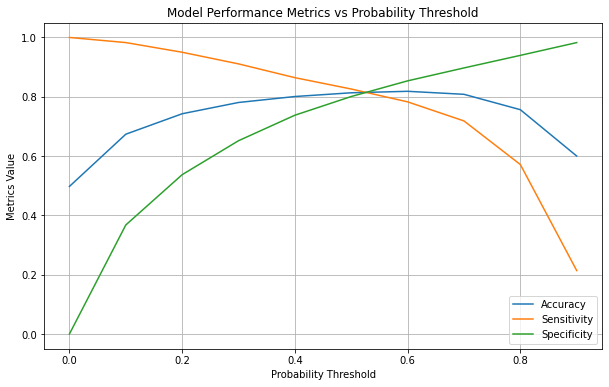

In [143]:
# Plot parameters

cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'], figsize=(10, 6))

plt.title('Model Performance Metrics vs Probability Threshold')
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics Value')
plt.grid(True)
plt.legend(['Accuracy', 'Sensitivity', 'Specificity'])

plt.show()

In [144]:
# Prediction on train data based on optimal cutoff

y_train_pred['final_predicted'] = y_train_pred.Churn_Prob.map( lambda x: 1 if x > 0.6 else 0)

In [145]:
# Validating evaluation metric on Train data

print("Evaluating model on Train data : ")
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train_pred.Churn_actual,
                                                             y_train_pred.final_predicted)

Evaluating model on Train data : 
Accuracy :  81.84
ROC AUC:  81.83
Precision:  84.13
Recall:  78.28


In [146]:
from sklearn import metrics

# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred.Churn_actual, y_train_pred.final_predicted )
print(confusion)

[[18795  3221]
 [ 4736 17070]]


In [147]:
# Accuracy

print('Accuracy :', round((metrics.accuracy_score(y_train_pred.Churn_actual,
                                                    y_train_pred.final_predicted))*100,2))

Accuracy : 81.84


### Sensitivity & Specificity

In [148]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [149]:
print('Sensitivity : ',round(TP / float(TP+FN),2))

print('Specificity : ',round(TN / float(TN+FP),2))

print('False Positive Rate :', round(FP/ float(TN+FP),2))

print("Positive Predictive Value :",round(TP / float(TP+FP),2))

print("Negative predictive value :",round(TN / float(TN+ FN),2))

Sensitivity :  0.78
Specificity :  0.85
False Positive Rate : 0.15
Positive Predictive Value : 0.84
Negative predictive value : 0.8


## ROC CURVE

In [150]:
# ROC Curve function

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve: Sensitivity vs 1 - Specificity')
    plt.legend(loc="lower right")
    plt.grid(True)
    
    plt.show()

    return None


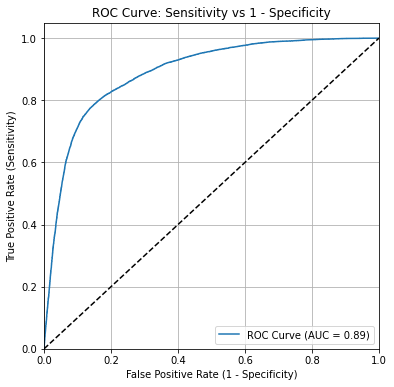

In [151]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred.Churn_actual,
                                            y_train_pred.Churn_Prob,
                                         drop_intermediate = False )

draw_roc(y_train_pred.Churn_actual, y_train_pred.Churn_Prob)

In [152]:
# Create columns with refined probability cutoffs

numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]

for i in numbers:
    y_train_pred[i]= y_train_pred.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,Churn_actual,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
51763,1,0.218392,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
831,0,0.008565,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8333,0,0.103721,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15757,0,0.258150,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40767,1,0.362216,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [153]:
# Calculate parameters for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix


num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.Churn_actual, y_train_pred[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.813427     0.826103     0.800872
0.51         0.51  0.814340     0.822342     0.806414
0.52         0.52  0.815641     0.819499     0.811819
0.53         0.53  0.816576     0.815509     0.817633
0.54         0.54  0.817169     0.811290     0.822992
0.55         0.55  0.817466     0.806475     0.828352
0.56         0.56  0.817877     0.801568     0.834030
0.57         0.57  0.818447     0.797395     0.839299
0.58         0.58  0.818607     0.792809     0.844159
0.59         0.59  0.818653     0.787948     0.849064


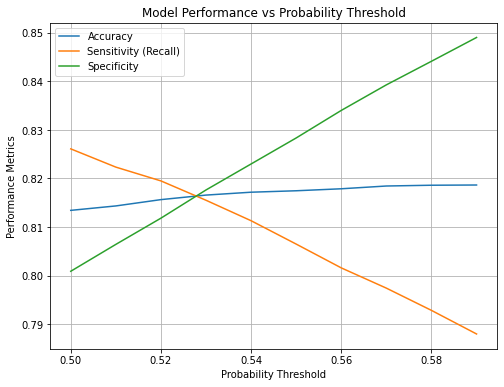

In [154]:
# Plot parameters for various probabilities

cutoff_df.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'], figsize=(8, 6))

plt.title('Model Performance vs Probability Threshold')
plt.xlabel('Probability Threshold')
plt.ylabel('Performance Metrics')
plt.legend(['Accuracy', 'Sensitivity (Recall)', 'Specificity'])
plt.grid(True)

plt.show()

Optimal cutoff point converges at 0.53

In [155]:
# Prediction on train data based on optimal cutoff

y_train_pred['final_predicted'] = y_train_pred.Churn_Prob.map( lambda x: 1 if x > 0.53 else 0)

In [156]:
# Validating evaluation metrics on Train data

print("Evaluating model on Train data : ")
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train_pred.Churn_actual,
                                                             y_train_pred.final_predicted)

Evaluating model on Train data : 
Accuracy :  81.66
ROC AUC:  81.66
Precision:  81.58
Recall:  81.55


In [157]:
from sklearn.metrics import precision_recall_curve

y_train_pred.Churn_actual, y_train_pred.Churn_Prob
p, r, thresholds = precision_recall_curve(y_train_pred.Churn_actual,
                                            y_train_pred.Churn_Prob)

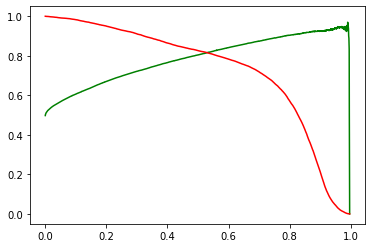

In [158]:
# Trade-off curve for precision-recall

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [159]:
# Applying final model on test set

X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

In [160]:
# Prediction based on optimal cutoff

y_pred_df = pd.DataFrame({'y_test_prob':y_test_pred, 'y_test_actual': y_test})
y_pred_df['final_predicted'] = y_pred_df.y_test_prob.map( lambda x: 1 if x > 0.53 else 0)

In [161]:
# Validating evaluation metric on test data

print("Evaluating model on Test data : ")
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_pred_df.y_test_actual, y_pred_df.final_predicted)

Evaluating model on Test data : 
Accuracy :  81.61
ROC AUC:  81.61
Precision:  81.45
Recall:  81.64


In [162]:
# Sccaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,tenure,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,avg_arpu_av678,avg_onnet_mou_av678,avg_offnet_mou_av678,avg_roam_ic_mou_av678,avg_roam_og_mou_av678,avg_loc_og_t2t_mou_av678,avg_loc_og_t2m_mou_av678,avg_loc_og_t2f_mou_av678,avg_loc_og_t2c_mou_av678,avg_std_og_t2t_mou_av678,avg_std_og_t2m_mou_av678,avg_std_og_t2f_mou_av678,avg_isd_og_mou_av678,avg_spl_og_mou_av678,avg_og_others_av678,avg_loc_ic_t2t_mou_av678,avg_loc_ic_t2m_mou_av678,avg_loc_ic_t2f_mou_av678,avg_std_ic_t2t_mou_av678,avg_std_ic_t2m_mou_av678,avg_std_ic_t2f_mou_av678,avg_spl_ic_mou_av678,avg_isd_ic_mou_av678,avg_ic_others_av678,avg_total_rech_num_av678,avg_total_rech_amt_av678,avg_max_rech_amt_av678,avg_last_day_rch_amt_av678,avg_max_rech_data_av678,avg_vol_2g_mb_av678,avg_vol_3g_mb_av678,avg_monthly_2g_av678,avg_sachet_2g_av678,avg_monthly_3g_av678,avg_sachet_3g_av678,avg_total_data_rech_amt_av678
17870,-0.484758,-0.361508,0.224144,-0.380014,-0.275839,0.098845,0.176980,-0.079613,0.179804,-0.31261,-0.316776,-0.329327,-0.328774,-0.358069,-0.360075,0.471083,0.777411,1.628421,1.402655,0.640658,1.068316,4.727110,6.299754,4.797033,-0.375920,-0.367752,-0.311874,-0.524061,-0.505286,-0.405931,-0.542011,-0.495295,-0.431078,0.188899,0.110074,-0.196158,-0.143287,-0.140864,-0.108747,-0.533278,-0.417572,-0.438523,-0.407973,-0.053892,-0.042642,-0.026354,0.312528,0.664215,0.047114,0.168901,0.274231,1.621775,0.984619,1.241746,-0.375868,-0.385134,-0.31995,-0.490557,-0.375494,-0.344655,0.398106,0.376144,-0.132012,-0.475388,-0.242689,-0.219266,-0.278849,-0.271283,-0.236902,-0.225498,-0.225992,-0.19479,-0.640470,-0.806403,-0.400992,-0.027739,-0.442141,0.258671,-0.361089,-0.341193,0.049988,0.185154,0.240277,0.690421,-0.716614,-0.686453,-0.560089,-0.451287,-0.427825,-0.336592,-0.461843,-0.454347,-0.383074,-0.382954,-0.375716,-0.312091,-0.473212,-0.463517,-0.387390,-0.403644,-0.389499,-0.321435,-0.320190,-0.299028,-0.227638,-0.386049,-0.429501,-0.426382,-0.169694,-0.47412,-0.465843,-0.354312,0.301220,-0.903834,-0.088425,-0.886629,-0.081334,-0.697688,-0.07785,-0.160458,-0.879099,-0.168076,-0.848809,-0.184588,-0.649848,0.687729,0.552304,0.325635,0.008304,0.005609,1.109324,0.539202,-2.614654,0.086251,

In [163]:
X_test = X_test[col]
X_test.head()

,arpu_7,loc_og_t2t_mou_7,loc_og_t2m_mou_8,std_og_t2t_mou_7,std_og_t2m_mou_8,loc_ic_t2m_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,max_rech_data_6,sachet_2g_6,sep_vbc_3g,night_pck_user_6_0.0,fb_user_8_1.0,avg_loc_og_t2t_mou_av678,avg_std_og_t2t_mou_av678
17870,-0.361508,0.777411,1.068316,-0.505286,-0.431078,0.274231,-0.219266,-0.400992,0.690421,-0.716614,-0.473212,-0.169694,-0.903834,-0.649848,1.109324,0.283643
10559,-0.868585,-0.247622,-0.658215,-0.495429,-0.442464,-0.729542,-0.219266,-0.534039,-0.664301,-0.716614,-0.473212,-0.169694,-0.903834,-0.649848,-0.281855,0.267052
24056,-0.366304,-0.512665,-0.520679,-0.495711,1.016866,-0.574043,-0.219266,-0.001850,0.690421,-0.716614,-0.473212,-0.169694,-0.903834,-0.649848,0.280432,0.267526
38320,1.646765,0.335922,-0.658215,3.545647,-0.442464,-0.729542,-0.219266,-0.767086,-0.664301,-0.716614,-0.473212,-0.169694,-0.903834,-0.649848,-1.294632,-3.515275
20388,0.157965,-0.012649,0.667401,-0.506272,-0.442464,0.622788,-0.219266,0.264245,0.377793,0.247990,-0.473212,-0.169694,1.106398,-0.649848,0.177845,0.285302


In [164]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

17870    0.221663
10559    0.868792
24056    0.649916
38320    0.944358
20388    0.282469
50619    0.550644
35573    0.472444
3372     0.577590
31909    0.639895
45445    0.951716
dtype: float64

In [165]:
# Converting y_pred to dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
17870,0.221663
10559,0.868792
24056,0.649916
38320,0.944358
20388,0.282469


In [166]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [167]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [168]:
# Concatenating y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,dframe,Prospect ID,0
17870,0,17870,0.221663
10559,1,10559,0.868792
24056,0,24056,0.649916
38320,1,38320,0.944358
20388,0,20388,0.282469


In [169]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,dframe,Prospect ID,Converted_prob
17870,0,17870,0.221663
10559,1,10559,0.868792
24056,0,24056,0.649916
38320,1,38320,0.944358
20388,0,20388,0.282469


In [170]:
y_pred_final = y_pred_final[['Prospect ID','dframe','Converted_prob']]
y_pred_final['dframe_predicted'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,dframe,Converted_prob,dframe_predicted
17870,17870,0,0.221663,22
10559,10559,1,0.868792,87
24056,24056,0,0.649916,65
38320,38320,1,0.944358,94
20388,20388,0,0.282469,28


In [171]:
# Making predictions on test set using 0.53 as optimal cutoff

y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.53 else 0)
y_pred_final.head()

,Prospect ID,dframe,Converted_prob,dframe_predicted,final_Predicted
17870,17870,0,0.221663,22,0
10559,10559,1,0.868792,87,1
24056,24056,0,0.649916,65,1
38320,38320,1,0.944358,94,1
20388,20388,0,0.282469,28,0


In [172]:
# Accuracy

metrics.accuracy_score(y_pred_final.dframe, y_pred_final.final_Predicted)

0.8158999634903249

In [173]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final.dframe,
                                        y_pred_final.final_Predicted )
confusion2

array([[4484, 1020],
       [ 997, 4455]], dtype=int64)

In [174]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] #
FN = confusion2[1,0]

In [175]:
print("Precision :",round((precision_score(y_pred_final.dframe ,
                                                y_pred_final.final_Predicted))*100,2))
print("Recall :",round((recall_score(y_pred_final.dframe,
                                                y_pred_final.final_Predicted))*100,2))

Precision : 81.37
Recall : 81.71


In [176]:

print('Sensitivity : ',round((TP / float(TP+FN))*100,2))


print('Specificity : ',round((TN / float(TN+FP))*100,2))

# Calculate False Postive Rate - predicting conversion when customer does not convert
print('False Positive Rate :', round(FP/ float(TN+FP),2))

# positive predictive value
print("Positive Predictive Value :",round(TP / float(TP+FP),2))

# Negative predictive value
print("Negative predictive value :",round(TN / float(TN+ FN),2))

Sensitivity :  81.71
Specificity :  81.47
False Positive Rate : 0.19
Positive Predictive Value : 0.81
Negative predictive value : 0.82


In [177]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_pred_final.dframe ,
                                                y_pred_final.final_Predicted)

# add the model scores to score list
model_score_list.append({'model_name':'Logistic Regression Without PCA',
                        'acc_score':acc_score,
                        'roc_score':roc_score,
                        'precision_score':prec_score,
                        'recall_score':rec_score})

Accuracy :  81.59
ROC AUC:  81.59
Precision:  81.37
Recall:  81.71


## Final Result

In [178]:
model_score_df = pd.DataFrame(model_score_list,columns=['model_name',
                                                        'acc_score',
                                                        'roc_score',
                                                        'precision_score',
                                                        'recall_score'])

# OSort by descending order
model_score_df.sort_values(['recall_score','roc_score'], ascending=False)

,model_name,acc_score,roc_score,precision_score,recall_score
11,KNeighborsClassifier with PCA(Optimal Hyperpar...,87.95,88.01,80.54,99.93
9,KNeighborsClassifier,89.09,89.14,82.07,99.91
10,KNeighborsClassifier with PCA,89.14,89.19,82.14,99.89
3,RandomForestClassifier,97.17,97.17,96.27,98.11
5,RandomForestClassifier with PCA (Optimal Hyper...,95.80,95.81,93.80,98.04
4,RandomForestClassifier with PCA,95.84,95.85,94.24,97.60
6,DecisionTreeClassifier,92.55,92.56,91.83,93.34
16,GradientBoostingClassifier,93.12,93.12,92.96,93.23
8,DecisionTreeClassifier with PCA(Optimal Hyper...,89.70,89.71,89.05,90.43
12,AdaBoostClassifier,90.88,90.88,91.19,90.41


###  Top features selection

In [179]:
res.params.sort_values(ascending=False)

max_rech_data_6             0.589017
arpu_7                      0.484571
sachet_2g_6                 0.397385
std_og_t2m_mou_8           -0.245154
avg_std_og_t2t_mou_av678   -0.282436
const                      -0.290490
std_og_t2t_mou_7           -0.391814
spl_ic_mou_8               -0.393142
total_rech_num_8           -0.417214
avg_loc_og_t2t_mou_av678   -0.449754
last_day_rch_amt_8         -0.491137
loc_og_t2t_mou_7           -0.540254
loc_og_t2m_mou_8           -0.541498
loc_ic_t2m_mou_8           -0.551102
night_pck_user_6_0.0       -0.619637
sep_vbc_3g                 -0.667756
fb_user_8_1.0              -1.011052
dtype: float64

## <font color = GoldenRod> *Most Important Predictors*

* **max_rech_data_6**: The maximum recharge done in June. Higher data recharge amounts in the June are positively correlated with churn.

* **arpu_7**: Average Revenue Per User in July. Higher ARPU in July is positively related to churn.

* **sachet_2g_6**: Usage of 2G sachet packs in June. Increased usage of these packs in the June positively impacts churn

* **std_og_t2m_mou_8**: Standard outgoing minutes to mobile numbers in action phase (August). This has a negative impact, indicating that higher usage negatively correlates with churn

* **avg_std_og_t2t_mou_av678**: Average standard outgoing minutes of usage to the same number type across June, July, August. This variable negatively correlates with the target, suggesting that consistent calling patterns across these months might reduce the likelihood of achieving the target

**<font color = DarkGoldenRod> Recommendations:**


* Target retention for customers with less than 4 years of service duration. Offer loyalty programs or incentives to increase engagement.

* Improve ARPU: Look at high-ARPU customers who stay and try to their successful strategies for at-risk customers.

* Incoming & outgoing roaming calls during Action phase are strong indicators of churn.

* Revise Facebook user pack pricing if it contributes to churn, or offer more value-added services.

* Engage customers with decreased incoming local and outgoing ISD call usage, especially in August, with personalized offers.

* Monitor value-based cost increases during the action phase and offer targeted promotions, loyalty rewards etc.
